In [25]:
path_mnist = "/home/melidia/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4"

In [1]:
path_fruits = "/home/melidia/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360/"

pentru mnist fashion-mnist_test.csv t10k-images-idx3-ubyte train-images-idx3-ubyte fashion-mnist_train.csv t10k-labels-idx1-ubyte train-labels-idx1-ubyte sunt fisiere

pentru fruis avem fruits-360_dataset_100x100 fruits-360_dataset_original-size sunt foldere

Fluxul de extragere al atributelor: scalez imaginile la aceeasi dimenisune, gasesc conturul imaginilor bazat pe mai multe puncte (nu stiu exact prin ce algoritm), dupa fac PCA pe punctele respective, rezultatul va fi un vector. cu cat vectorii sunt mai apropiati in spatiul geometric cu atat sunt mai apropiati ca sens

Vizualizarea atributelor extrase pentru fruit dataset, respectiv mnist

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
import os
import cv2
import numpy as np

path_fruits_train = path_fruits + "Training"
path_fruits_test = path_fruits + "Test"
number_train = {}
number_test = {}

images_fruits_train = []
images_fruits_test = []
labels_fruits_train = []
labels_fruits_test = []

def process_images(path, images_list, labels_list, number_dict, image_size):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if (folder_name.split(" "))[0] not in number_dict:
                number_dict[(folder_name.split(" "))[0]] = 0
            number_dict[(folder_name.split(" "))[0]] += len(files)
            for file in files:
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                    images_list.append(img)
                    labels_list.append((folder_name.split(" "))[0])

process_images(path_fruits_train, images_fruits_train, labels_fruits_train, number_train, (20, 20))

process_images(path_fruits_test, images_fruits_test, labels_fruits_test, number_test, (20, 20))

images_fruits_train = np.array(images_fruits_train)
labels_fruits_train = np.array(labels_fruits_train)
images_fruits_test = np.array(images_fruits_test)
labels_fruits_test = np.array(labels_fruits_test)

images_fruits_train = scaler.fit_transform([i.flatten() for i in images_fruits_train])
images_fruits_test = scaler.fit_transform([i.flatten() for i in images_fruits_test])

print(f"Numărul de imagini pentru antrenare: {len(images_fruits_train)}")
print(f"Numărul de imagini pentru test: {len(images_fruits_test)}")


Numărul de imagini pentru antrenare: 70491
Numărul de imagini pentru test: 23619


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca_train_features_fruits = pca.fit_transform(images_fruits_train)
pca_test_features_fruits = pca.transform(images_fruits_test)


In [ ]:
import cv2
import numpy as np
import os
import pandas as pd

hu_moments = []
path = path_fruits + "Training"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments.append(humoments)
            
hu_moments_test = []
path = path_fruits + "Test"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments_test.append(humoments)

In [6]:
hu_moments = [i.flatten() for i in hu_moments]
hu_moments_test = [i.flatten() for i in hu_moments_test]

results_train = []
results_test = []

for i in range(len(pca_train_features_fruits)):
    result = np.concatenate((pca_train_features_fruits[i], hu_moments[i]))
    results_train.append(result)

for i in range(len(pca_test_features_fruits)):
    result = np.concatenate((pca_test_features_fruits[i], hu_moments_test[i]))
    results_test.append(result)

In [7]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(results_train)
selector.transform(results_test)

array([[ 15.29783547,   4.69946066,   7.71163444, ...,  22.6295093 ,
         15.79869101,  22.4975811 ],
       [ 10.152849  ,   6.81861204,   9.34175116, ...,  21.7573614 ,
        -15.02212146,  21.54024196],
       [ 15.95459502,   4.07884344,   8.33279129, ...,  22.33236484,
         15.6643791 ,  22.46275951],
       ...,
       [ -5.87783636,   9.92311606,  -5.92083393, ...,  19.18566359,
        -12.8631953 ,  19.09523817],
       [ -3.63835321,   6.89833488,   4.5759516 , ..., -22.45108906,
        -15.13627596, -21.86000638],
       [ -5.04154873,   7.59983575,   3.50022361, ...,  25.54214168,
        -16.38885702,  23.69974492]])

In [8]:
results_train = scaler.fit_transform([i.flatten() for i in results_train])
results_test = scaler.fit_transform([i.flatten() for i in results_test])


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=1, max_iter=100, multi_class='auto', solver = 'newton-cg', n_jobs=-1)

# scaler_test = preprocessing.StandardScaler().fit(results_test)
# test = scaler_test.transform(results_test)

# scaler_train = preprocessing.StandardScaler().fit(results_train)
# train = scaler_test.transform(results_train)

model.fit(results_train, labels_fruits_train)
y_pred = model.predict(results_test)
accuracy = accuracy_score(labels_fruits_test, y_pred)
accuracy
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# accuracy = accuracy_score(labels_fruits_test, y_pred)
# f1 = f1_score(labels_fruits_test, y_pred, average='weighted')
# precision = precision_score(labels_fruits_test, y_pred, average='weighted')
# recall = recall_score(labels_fruits_test, y_pred, average='weighted')

# avg_precision = precision.mean()
# avg_recall = recall.mean()
# avg_f1 = f1.mean()
# var_precision = precision.var()
# var_recall = recall.var()
# var_f1 = f1.var()

# import pandas as pd

# data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
#         'Mean': [avg_f1, avg_precision, avg_recall],
#         'Variance': [var_f1, var_precision, var_recall]}

# df = pd.DataFrame(data)
# df

0.6533299462297303

In [ ]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
df_mnist_test = pd.read_csv(path_mnist_test)

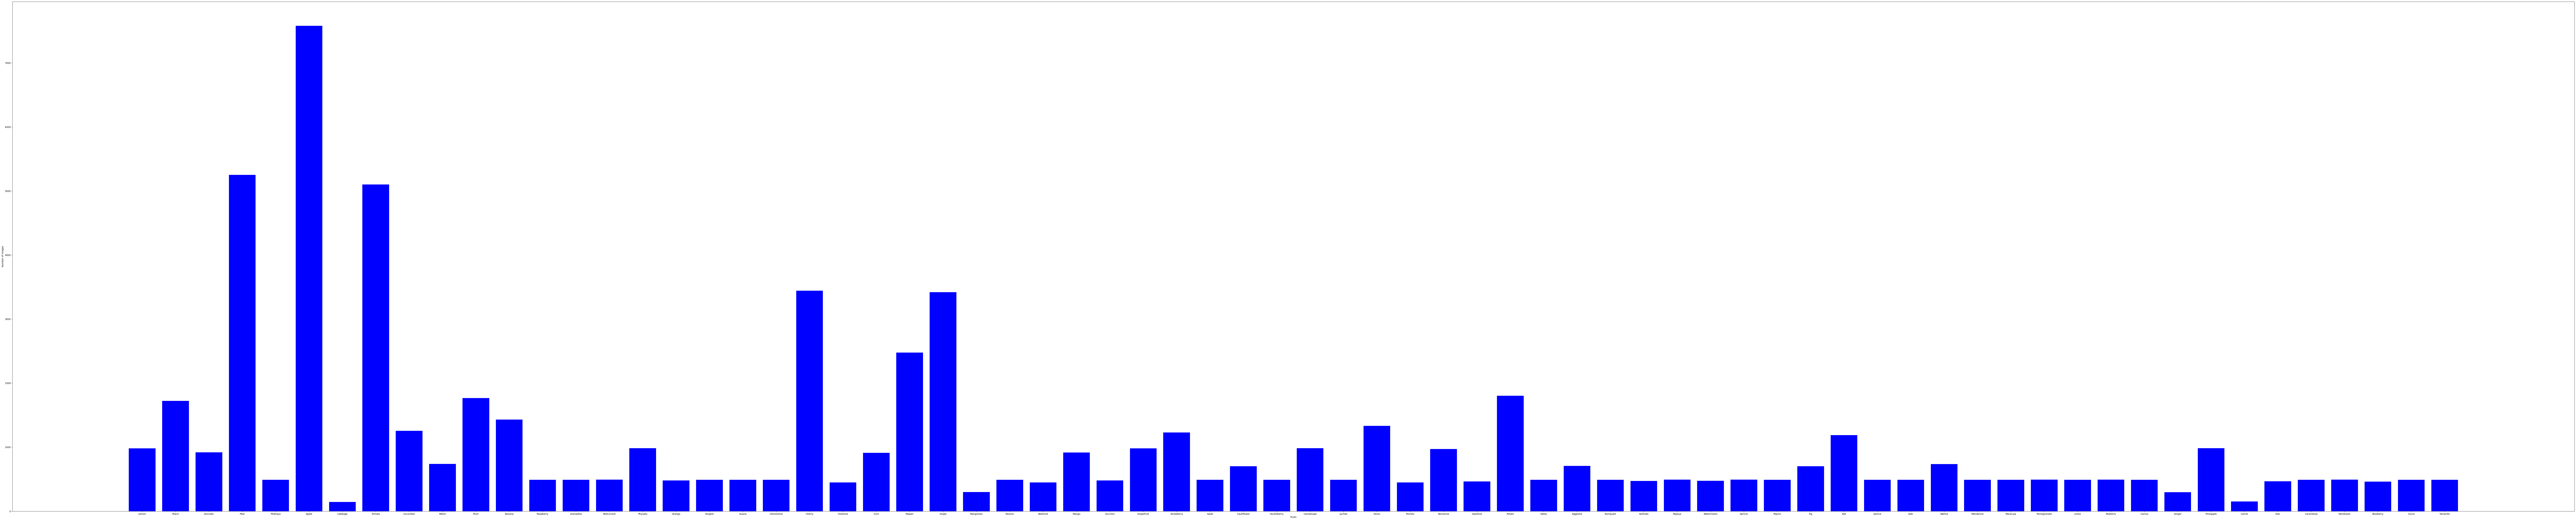

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 40))
plt.bar(number_train.keys(), number_train.values(), color='b')

plt.xlabel('Fruits')
plt.ylabel('Number of images')
plt.show()

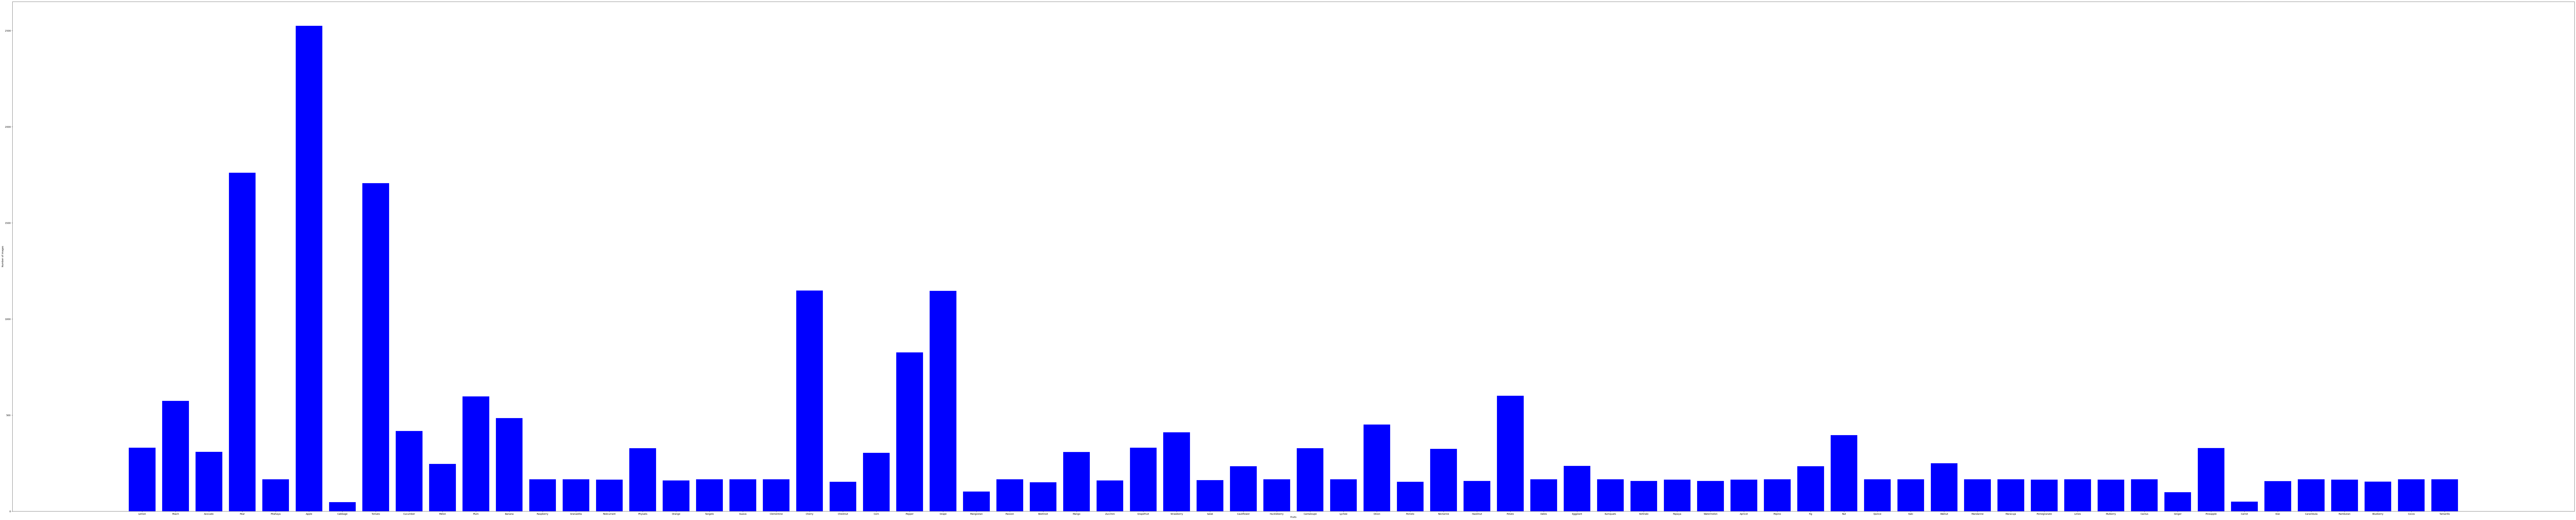

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 40))
plt.bar(number_test.keys(), number_test.values(), color='b')

plt.xlabel('Fruits')
plt.ylabel('Number of images')
plt.show()

In [ ]:
import pandas as pd

path_mnist_train = path_mnist + "/fashion-mnist_train.csv"
real_df_mnist_train = pd.read_csv(path_mnist_train)

path_mnist_test = path_mnist + "/fashion-mnist_test.csv"
real_df_mnist_test = pd.read_csv(path_mnist_test)

<AxesSubplot: xlabel='label', ylabel='count'>

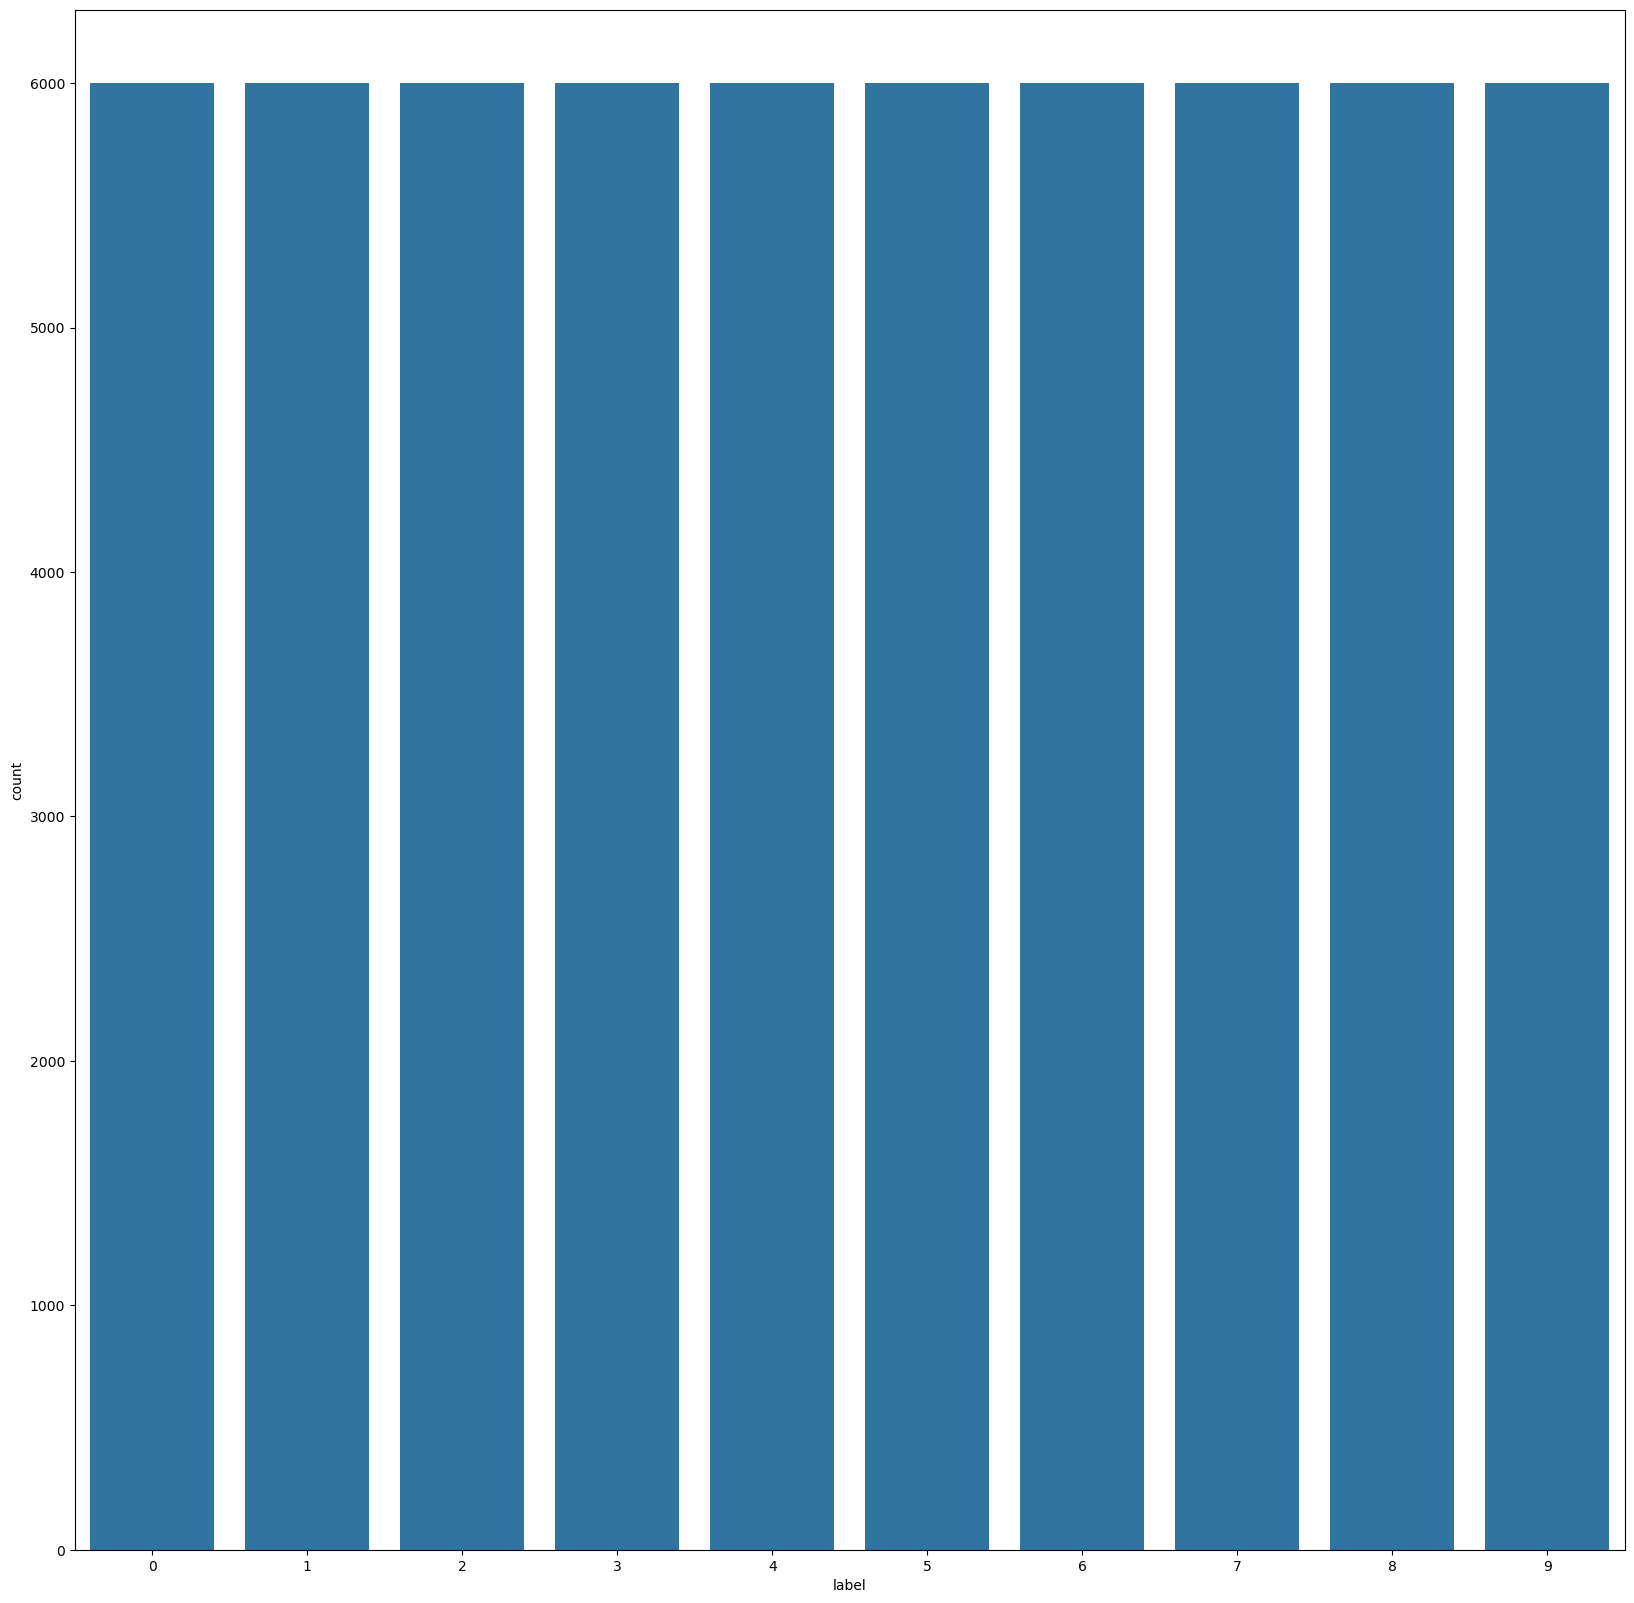

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.countplot(x='label', data=real_df_mnist_train)

<AxesSubplot: xlabel='label', ylabel='count'>

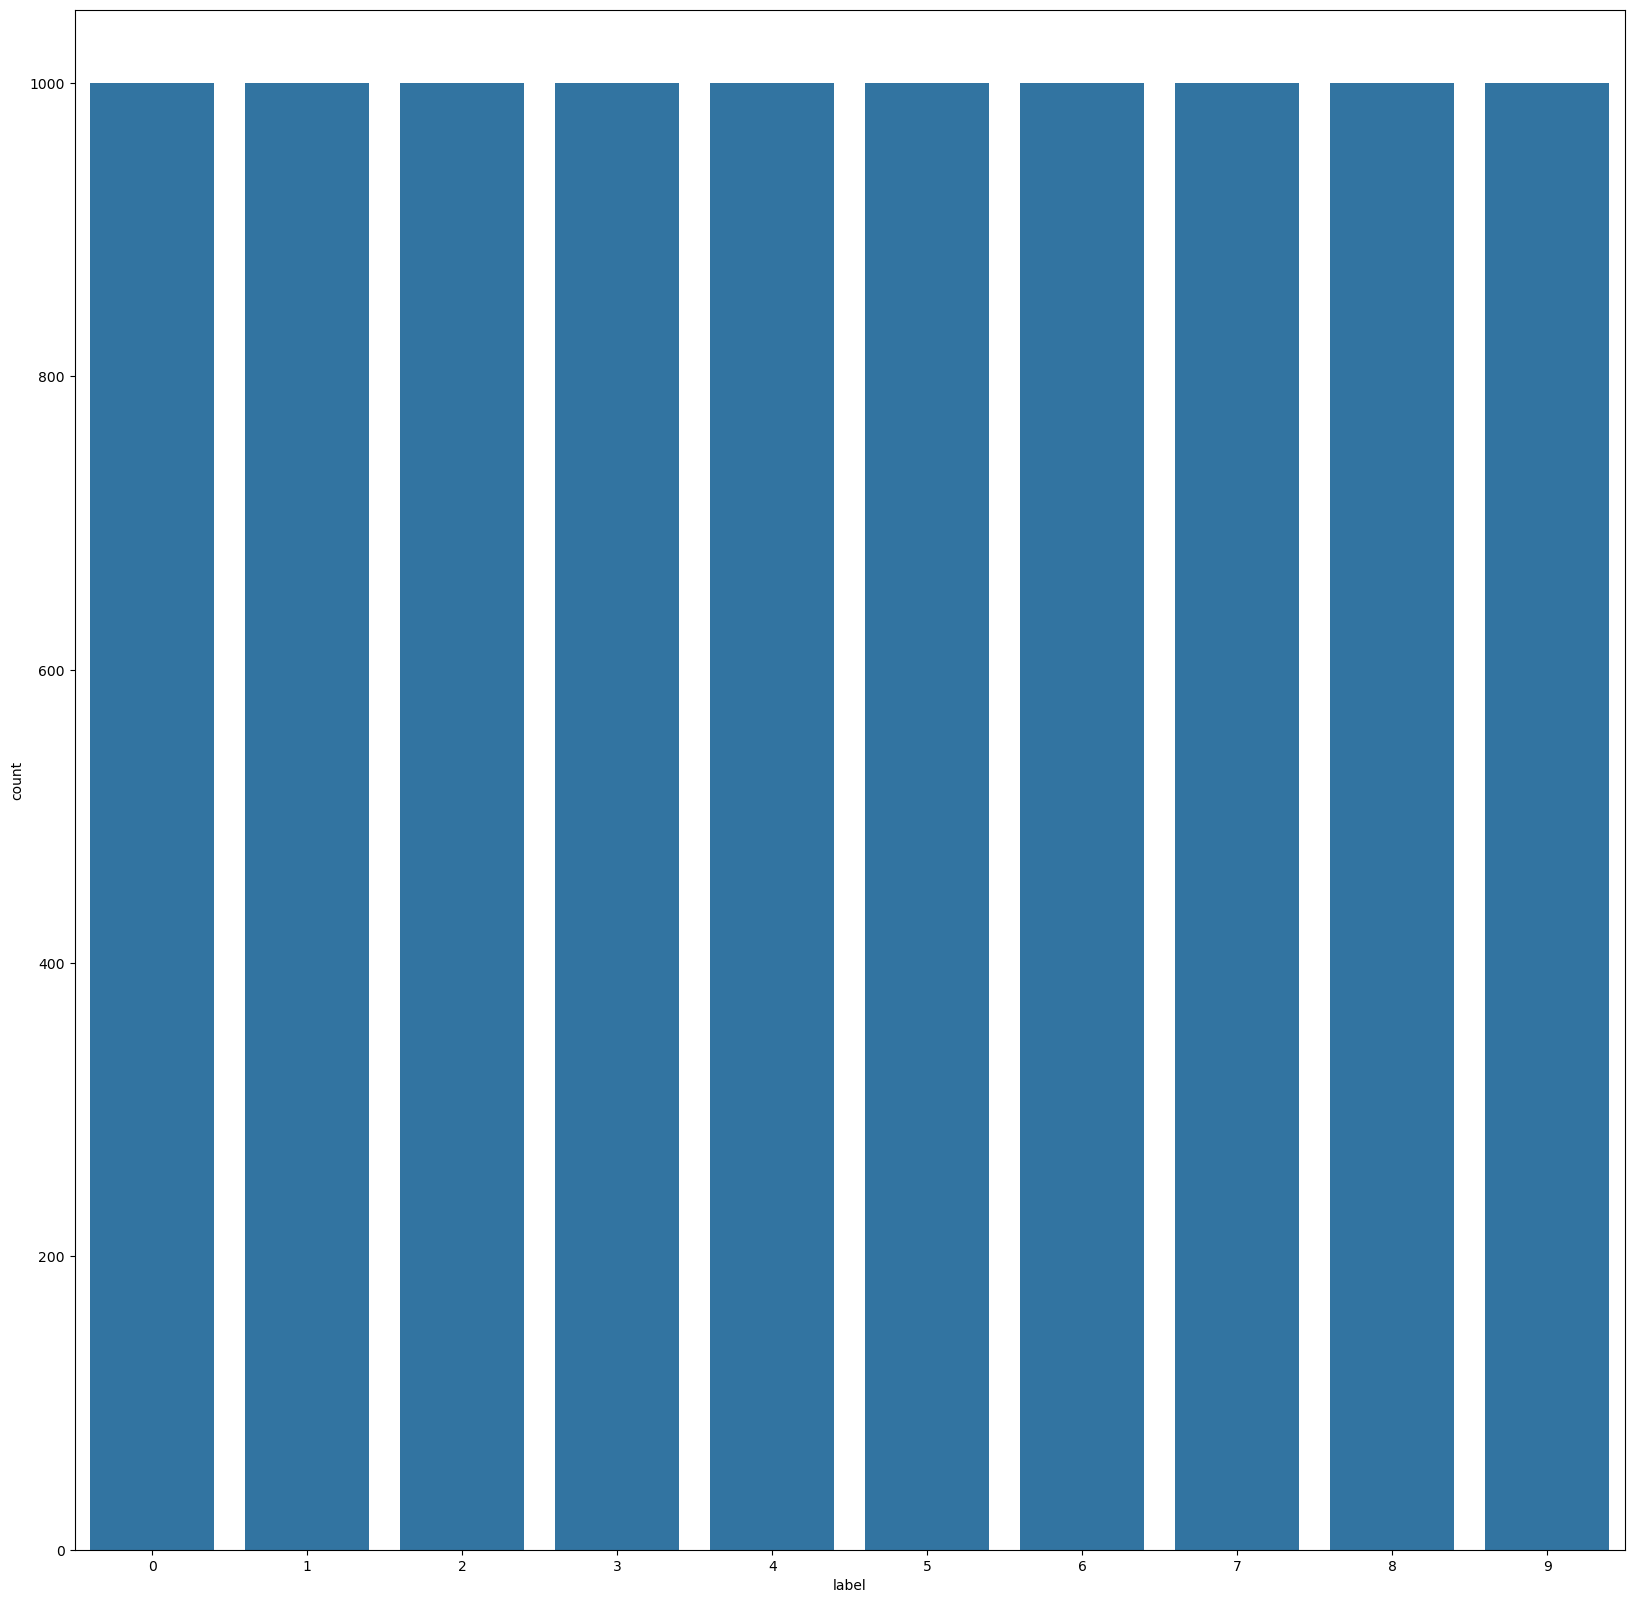

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.countplot(x='label', data=real_df_mnist_test)

In [11]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Apply PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(images_fruits_train)

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# pca_df['label'] = labels_fruits_train

# # Plot the principal components
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10')
# plt.title('PCA Fruit dataset')
# plt.show()

In [12]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns

# # Apply PCA
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(images_fruits_train)

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# pca_df['label'] = labels_fruits_train

# # Plot the principal components
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10')
# plt.title('PCA Fruit dataset')
# plt.show()

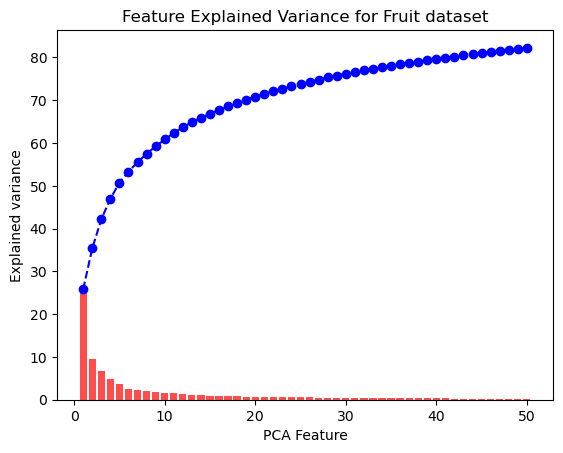

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=50)
principal_components = pca.fit_transform(images_fruits_train)

explained_variance = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(range(1, 51), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.bar(range(1, 51), explained_variance, alpha=0.7, color='r')

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance for Fruit dataset')
plt.show()

In [28]:
label_train = real_df_mnist_train["label"]
label_test = real_df_mnist_test["label"]

df_mnist_train = real_df_mnist_train.drop(columns=["label"])
df_mnist_test = real_df_mnist_test.drop(columns=["label"])

In [7]:
df_mnist_train.shape

(60000, 784)

In [29]:
mnist_train = []
mnist_test = []

for i in range(len(df_mnist_train)):
    mnist_train.append(df_mnist_train.iloc[i].values)

for i in range(len(df_mnist_test)):
    mnist_test.append(df_mnist_test.iloc[i].values)

In [30]:
import numpy as np

mnist_train = np.array(mnist_train)
mnist_test = np.array(mnist_test)
mnist_train = scaler.fit_transform([i.flatten() for i in mnist_train])
mnist_test = scaler.fit_transform([i.flatten() for i in mnist_test])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca_train_features_mnist =  pca.fit_transform(mnist_train)
pca_test_features_mnist = pca.transform(mnist_test)


In [32]:
#apply hu moments to the fruits dataset
import cv2
import numpy as np
import os
import pandas as pd

hu_moments = []
for pixels in mnist_train:
    im = pixels.reshape(28, 28)
    _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(im)
    humoments = cv2.HuMoments(moments)
    for i in range(0, 7):
        humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
    hu_moments.append(humoments)
    
hu_moments_test = []
for pixels in mnist_test:
    im = pixels.reshape(28, 28)
    _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
    moments = cv2.moments(im)
    humoments = cv2.HuMoments(moments)
    for i in range(0, 7):
        humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
    hu_moments_test.append(humoments)

/tmp/ipykernel_849/737351452.py:14: RuntimeWarning: divide by zero encountered in log10
  humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
/tmp/ipykernel_849/737351452.py:24: RuntimeWarning: divide by zero encountered in log10
  humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))


In [33]:
hu_moments = [i.flatten() for i in hu_moments]
hu_moments_test = [i.flatten() for i in hu_moments_test]

results_train = []
results_test = []

for i in range(len(pca_train_features_mnist)):
    result = np.concatenate((pca_train_features_mnist[i], hu_moments[i]))
    results_train.append(result)

for i in range(len(pca_test_features_mnist)):
    result = np.concatenate((pca_test_features_mnist[i], hu_moments_test[i]))
    results_test.append(result)

In [34]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

for i in results_train:
    i[np.isinf(i)] = 0
for i in results_test:
    i[np.isinf(i)] = 0

selector.fit_transform(results_train)
selector.transform(results_test)

array([[ 15.82149955,  -4.57461181,  -1.04161913, ...,   0.        ,
          0.        ,   0.        ],
       [ -1.43717885, -17.22475493,  -6.10928735, ...,   0.        ,
          0.        ,   0.        ],
       [ -9.82609451,  -3.29484024,  11.49374821, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  4.40546653,  10.04849403,   4.96298865, ...,   0.        ,
          0.        ,   0.        ],
       [ 19.67113607,  17.56683615,   0.33435817, ...,   0.        ,
          0.        ,   0.        ],
       [ 22.44078116,  -1.43838967,   4.58552341, ...,   0.        ,
          0.        ,   0.        ]])

In [35]:
results_train = scaler.fit_transform([i.flatten() for i in results_train])
results_test = scaler.fit_transform([i.flatten() for i in results_test])


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(results_train, label_train, test_size=0.35, random_state=42, shuffle=True)


In [28]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [5, 10, 50, 100, 200]
max_depth = [5, 10, 50, 100, 500, None]
max_features = [0.2, 0.5, 0.8, 1]

for number in number_trees:
    for maxd in max_depth:
        for feat in max_features:
            rf = RandomForestClassifier(n_estimators=number, max_depth=maxd, random_state=42, n_jobs=-1, max_samples=feat)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Number of Trees: {number}, Max Depth: {maxd} Accuracy: {acc}")

Number of Trees: 5, Max Depth: 5 Accuracy: 0.6885238095238095
Number of Trees: 5, Max Depth: 5 Accuracy: 0.6952857142857143
Number of Trees: 5, Max Depth: 5 Accuracy: 0.6946190476190476
Number of Trees: 5, Max Depth: 5 Accuracy: 0.101
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7774761904761904
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7905714285714286
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7863809523809524
Number of Trees: 5, Max Depth: 10 Accuracy: 0.101
Number of Trees: 5, Max Depth: 50 Accuracy: 0.7859047619047619
Number of Trees: 5, Max Depth: 50 Accuracy: 0.7999047619047619
Number of Trees: 5, Max Depth: 50 Accuracy: 0.8000952380952381
Number of Trees: 5, Max Depth: 50 Accuracy: 0.101
Number of Trees: 5, Max Depth: 100 Accuracy: 0.7859047619047619
Number of Trees: 5, Max Depth: 100 Accuracy: 0.7999047619047619
Number of Trees: 5, Max Depth: 100 Accuracy: 0.8000952380952381
Number of Trees: 5, Max Depth: 100 Accuracy: 0.101
Number of Trees: 5, Max Depth: 500 Accuracy:

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1, max_samples=0.8)
rf.fit(results_train, label_train)
y_pred = rf.predict(results_test)
acc = accuracy_score(label_test, y_pred)

f1 = f1_score(label_test, y_pred, average='weighted')
precision = precision_score(label_test, y_pred, average='weighted')
recall = recall_score(label_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.857277,0.0
1,Precision,0.857200,0.0
2,Recall,0.858900,0.0


In [40]:
from sklearn.metrics import classification_report
print(classification_report(label_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7992    0.8480    0.8229      1000
           1     0.9867    0.9670    0.9768      1000
           2     0.7923    0.7860    0.7892      1000
           3     0.8783    0.8950    0.8866      1000
           4     0.7768    0.8320    0.8035      1000
           5     0.9173    0.8990    0.9081      1000
           6     0.7033    0.5880    0.6405      1000
           7     0.8846    0.8740    0.8793      1000
           8     0.9420    0.9740    0.9577      1000
           9     0.8912    0.9260    0.9083      1000

    accuracy                         0.8589     10000
   macro avg     0.8572    0.8589    0.8573     10000
weighted avg     0.8572    0.8589    0.8573     10000



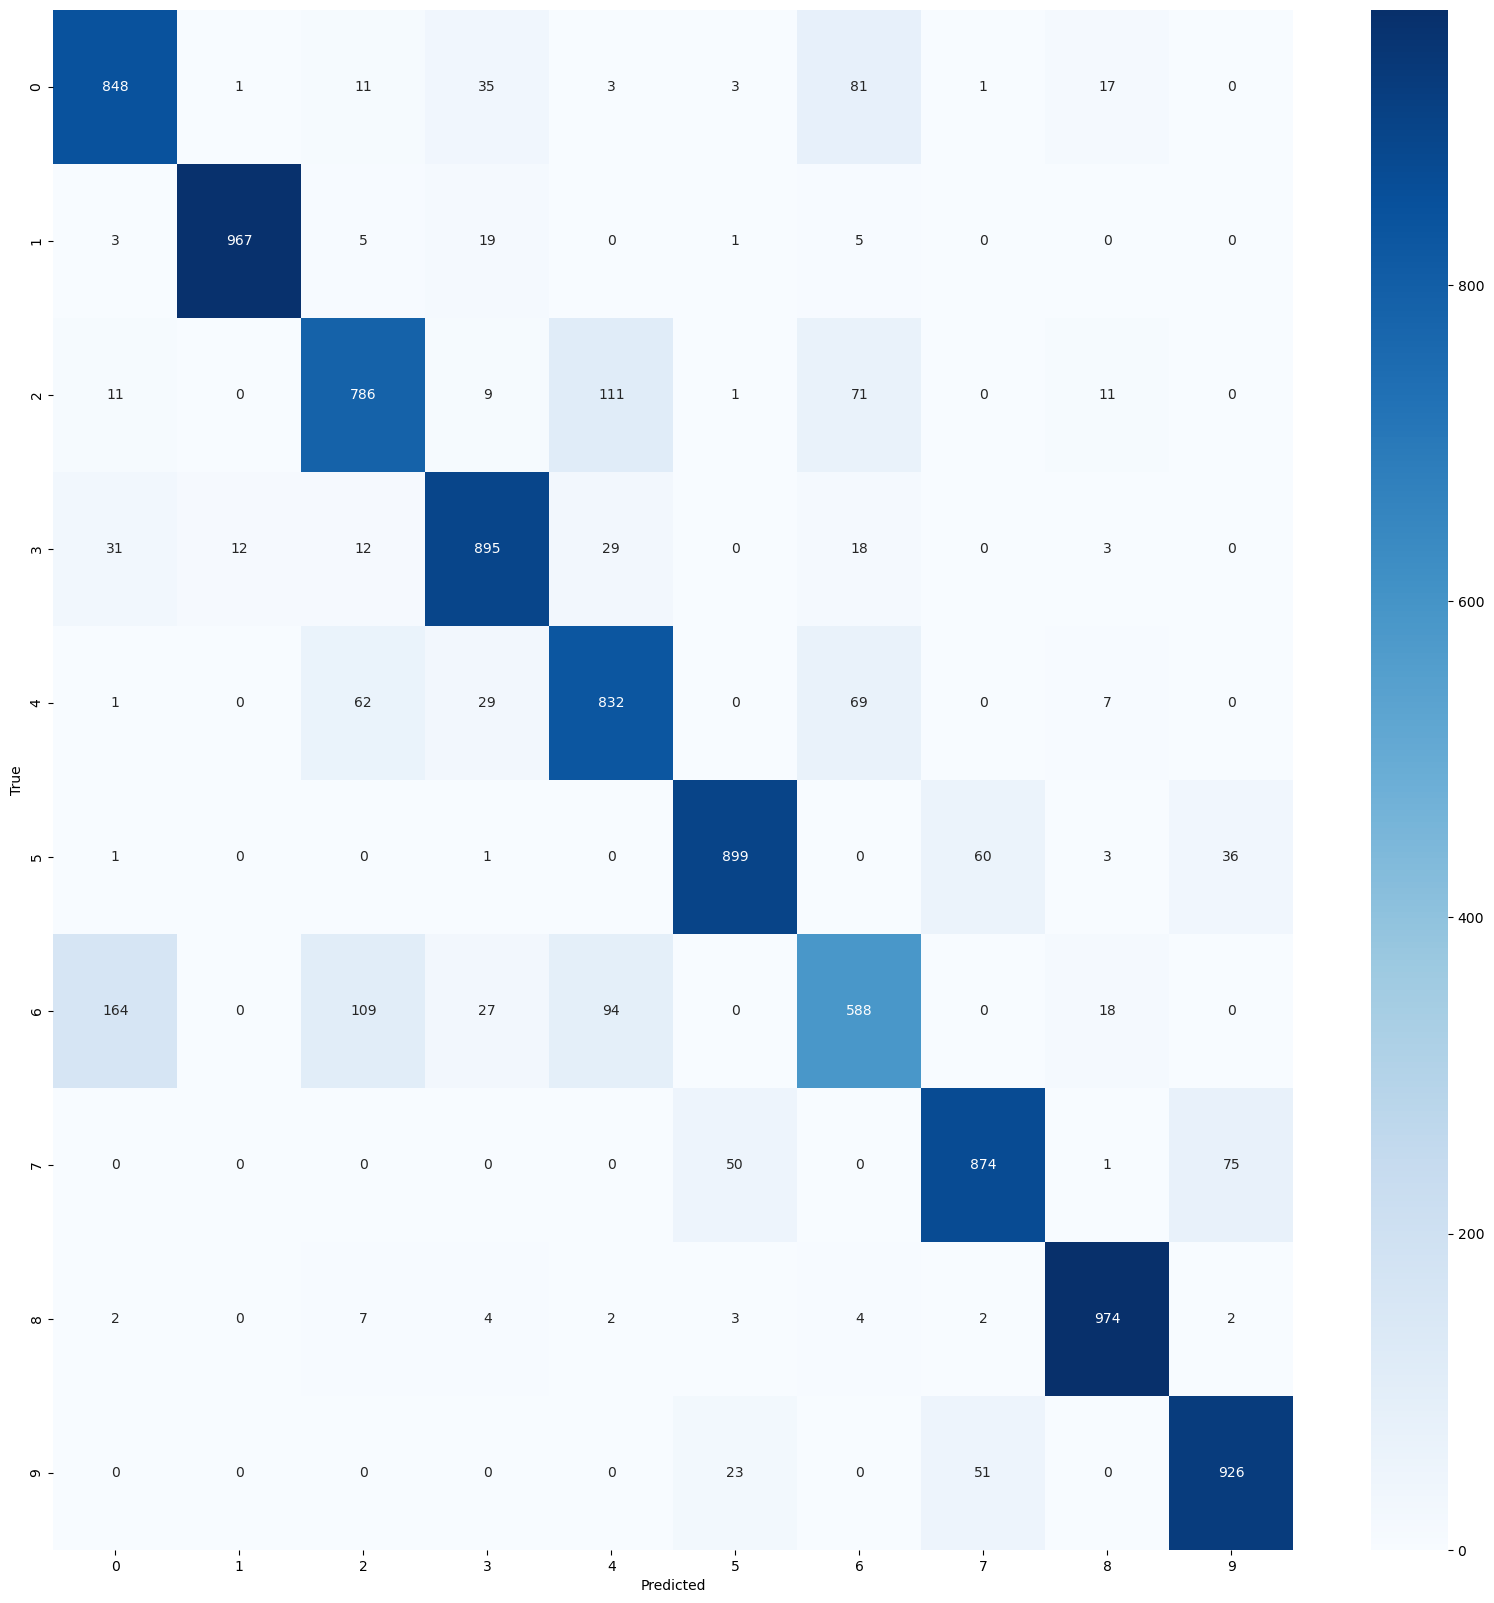

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

N = [10, 50, 100, 150, 200]
max_depth = [3, 5, 10, 20]
lr = [0.1, 0.01, 0.001]

label = LabelEncoder()
y_train = label.fit_transform(label_train)
y_test = label.transform(label_test)

xgb_train = xgb.DMatrix(results_train, label=y_train)
xgb_test = xgb.DMatrix(results_test, label=y_test)

for n in N:
    for maxd in max_depth:
        for learning in lr:
            params = {
                'max_depth': maxd,
                'learning_rate': learning,
                'objective': 'multi:softmax',
                'num_class': 10
            }
            xgb_model = xgb.train(params, xgb_train, num_boost_round=n)

            y_pred = xgb_model.predict(xgb_test)

            acc = accuracy_score(y_test, y_pred)
            print(f"Number of Trees: {n}, Max Depth: {maxd}, Learning Rate: {learning}, Accuracy: {acc}")


Number of Trees: 10, Max Depth: 3, Learning Rate: 0.1, Accuracy: 0.7581
Number of Trees: 10, Max Depth: 3, Learning Rate: 0.01, Accuracy: 0.7241
Number of Trees: 10, Max Depth: 3, Learning Rate: 0.001, Accuracy: 0.7159
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.1, Accuracy: 0.8034
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.01, Accuracy: 0.781
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.001, Accuracy: 0.7769
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.1, Accuracy: 0.8434
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.01, Accuracy: 0.8252
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.001, Accuracy: 0.8145
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.1, Accuracy: 0.8483
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.01, Accuracy: 0.8285
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.001, Accuracy: 0.8198
Number of Trees: 50, Max Depth: 3, Learning Rate: 0.1, Accuracy: 0.8014
Number of Trees: 50, Max Depth: 3, Learning Rat

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

label = LabelEncoder()
y_train = label.fit_transform(label_train)
y_test = label.transform(label_test)

# Conversia datelor în DMatrix
xgb_train = xgb.DMatrix(results_train, label=y_train)
xgb_test = xgb.DMatrix(results_test, label=y_test)

params = {
        'max_depth': 20,
        'learning_rate': 0.1,
        'objective': 'multi:softmax',
        'num_class': 10
        }

xgb_model = xgb.train(params, xgb_train, num_boost_round=200)

y_pred = xgb_model.predict(xgb_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.866336,0.0
1,Precision,0.866171,0.0
2,Recall,0.867300,0.0


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8062    0.8570    0.8308      1000
           1     0.9797    0.9650    0.9723      1000
           2     0.8043    0.7850    0.7945      1000
           3     0.8804    0.8910    0.8857      1000
           4     0.7950    0.8340    0.8141      1000
           5     0.9265    0.9080    0.9172      1000
           6     0.7055    0.6300    0.6656      1000
           7     0.9012    0.8940    0.8976      1000
           8     0.9578    0.9750    0.9663      1000
           9     0.9050    0.9340    0.9193      1000

    accuracy                         0.8673     10000
   macro avg     0.8662    0.8673    0.8663     10000
weighted avg     0.8662    0.8673    0.8663     10000



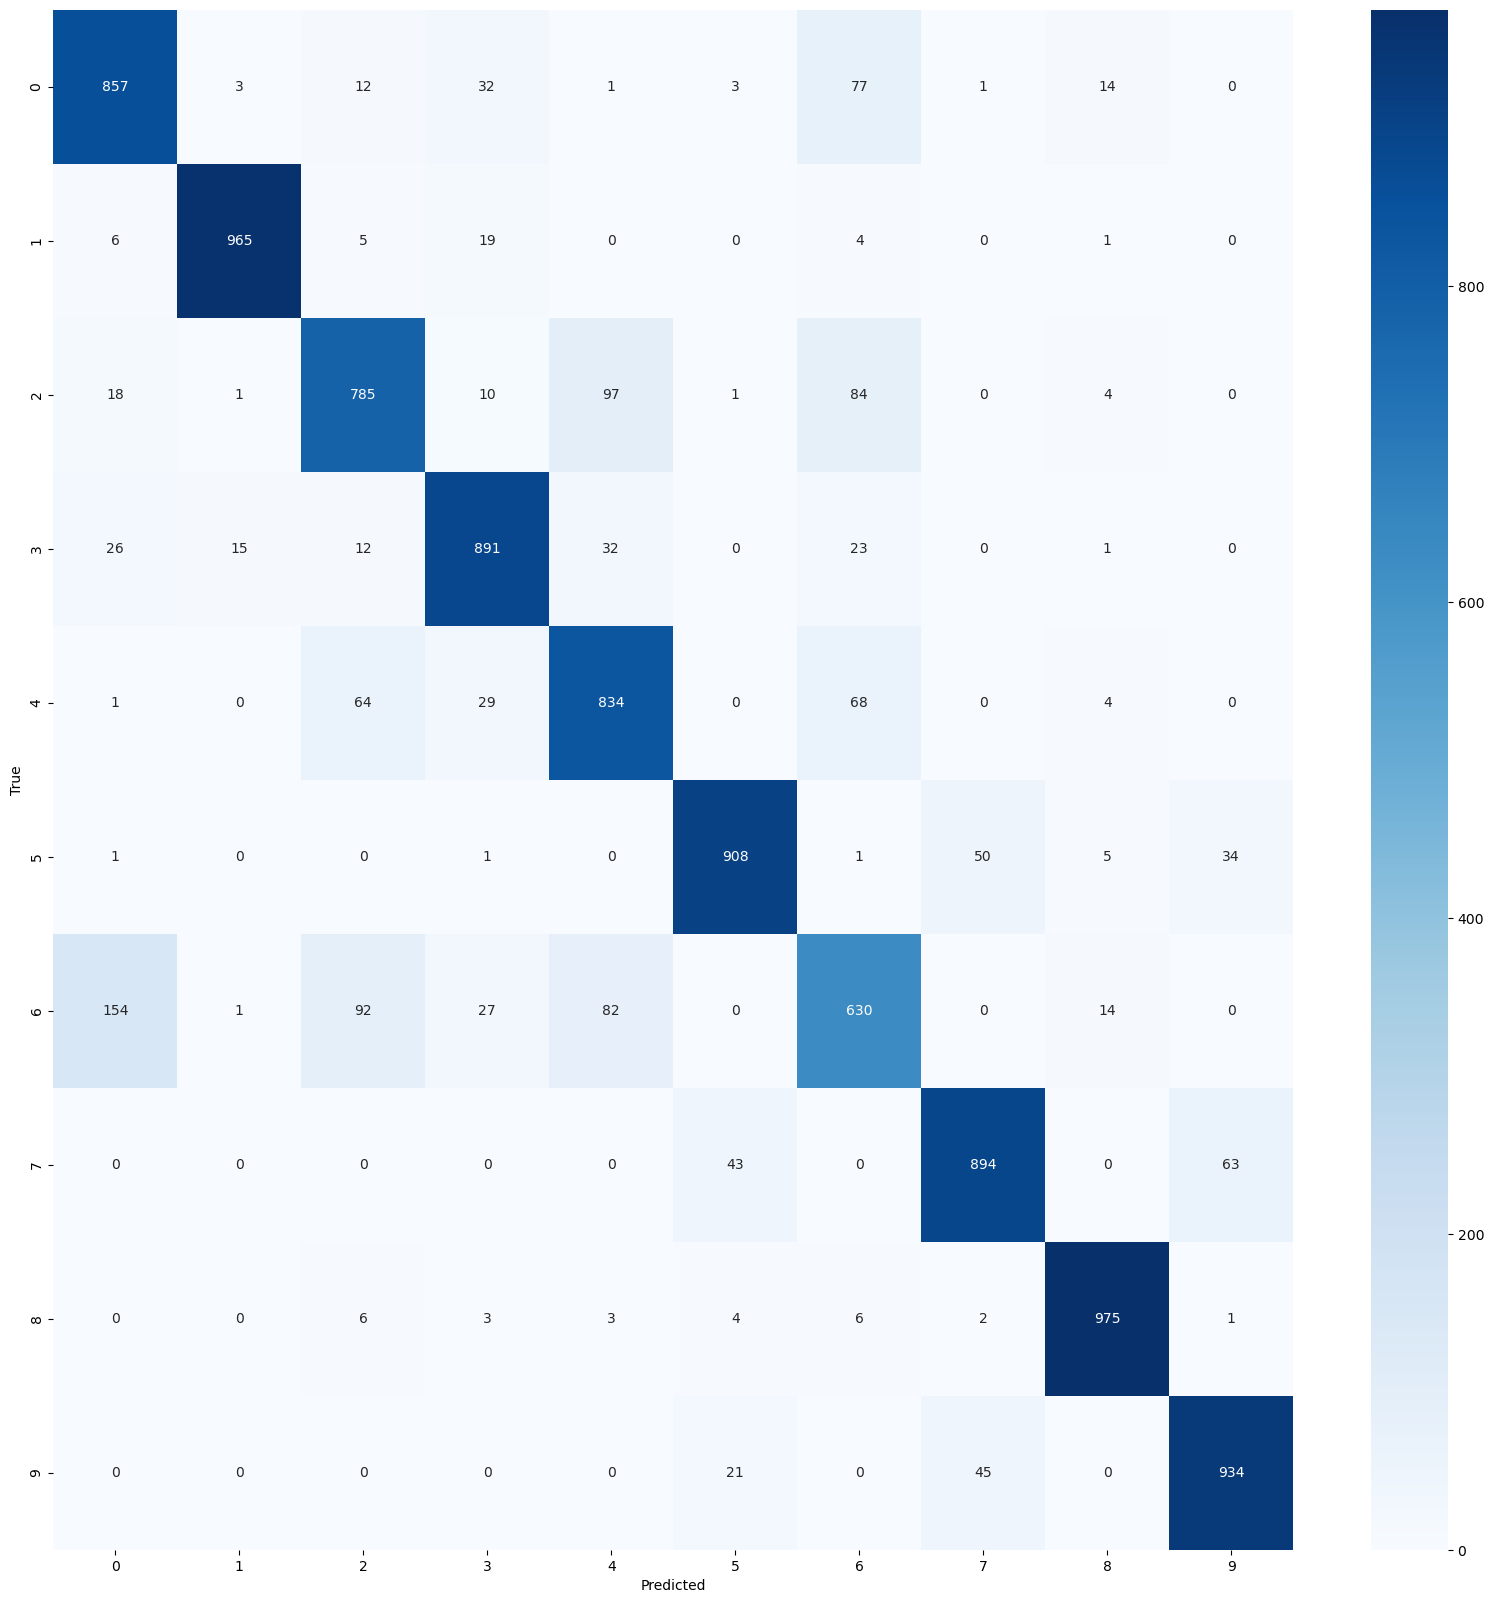

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

C = [0.1, 1, 10]
max_iter = [100, 1000, 10000]
multi_class = ['auto', 'ovr', 'multinomial']
solver = ['newton-cg', 'lbfgs', 'sag', 'saga']

for c in C:
    for maxiter in max_iter:
        for multi in multi_class:
            for s in solver:
                lr = LogisticRegression(C=c, max_iter=maxiter, multi_class=multi, solver=s, n_jobs=-1)
                lr.fit(X_train, y_train)
                y_pred = lr.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                print(f"C: {c}, Max Iter: {maxiter}, Multi Class: {multi}, Solver: {s}, Accuracy: {acc}")

C: 0.1, Max Iter: 100, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 100, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8062857142857143


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.7787619047619048


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.7692380952380953
C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7941904761904762
C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7944285714285715


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.7652380952380953


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.7581428571428571
C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8062857142857143


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.7788095238095238


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.7692380952380953
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8062857142857143


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.799


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.7943809523809524
C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7941904761904762
C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7944285714285715


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.7853333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.7805238095238095
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8062857142857143


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: sag, Accuracy: 0.799


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: saga, Accuracy: 0.7943809523809524
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8062857142857143
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: sag, Accuracy: 0.802047619047619
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: saga, Accuracy: 0.7991904761904762
C: 0.1, Max Iter: 10000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7941904761904762
C: 0.1, Max Iter: 10000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7944285714285715
C: 0.1, Max Iter: 10000, Multi Class: ovr, Solver: sag, Accuracy: 0.7892857142857143
C: 0.1, Max Iter: 10000, Multi Class: ovr, Solver: saga, Accuracy: 0.7867142857142857
C: 0.1, Max Iter: 10000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8061428571428572
C: 0.1, Max Iter: 10000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8062857142857143
C: 0.1, Max 

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.7788095238095238


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.7691428571428571
C: 1, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7974761904761904
C: 1, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7974285714285714


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.7652380952380953


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.7581428571428571
C: 1, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8090952380952381
C: 1, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8093333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.7788095238095238


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.7692857142857142
C: 1, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8090952380952381
C: 1, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8093333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.7993333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.7945714285714286
C: 1, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7974761904761904
C: 1, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7974285714285714


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.786047619047619


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.781
C: 1, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8090952380952381
C: 1, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8093333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: multinomial, Solver: sag, Accuracy: 0.7993809523809524


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 1, Max Iter: 1000, Multi Class: multinomial, Solver: saga, Accuracy: 0.7945714285714286
C: 1, Max Iter: 10000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8090952380952381
C: 1, Max Iter: 10000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8093333333333333
C: 1, Max Iter: 10000, Multi Class: auto, Solver: sag, Accuracy: 0.8042857142857143
C: 1, Max Iter: 10000, Multi Class: auto, Solver: saga, Accuracy: 0.8007142857142857
C: 1, Max Iter: 10000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7974761904761904
C: 1, Max Iter: 10000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7974285714285714
C: 1, Max Iter: 10000, Multi Class: ovr, Solver: sag, Accuracy: 0.7905714285714286
C: 1, Max Iter: 10000, Multi Class: ovr, Solver: saga, Accuracy: 0.787952380952381
C: 1, Max Iter: 10000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8090952380952381
C: 1, Max Iter: 10000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8093333333333333
C: 1, Max Iter: 10000, Multi Class

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 10, Max Iter: 100, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8105238095238095


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.7788571428571428


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.7692857142857142
C: 10, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7976190476190477
C: 10, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7973333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.7651904761904762


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.7581428571428571
C: 10, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8106190476190476


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 10, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8105238095238095


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.7789047619047619


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.7693809523809524
C: 10, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8106190476190476
C: 10, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8105238095238095


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.7995714285714286


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.7944761904761904
C: 10, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7976190476190477
C: 10, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7973333333333333


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.7860952380952381


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.7810952380952381
C: 10, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8106190476190476
C: 10, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8105238095238095


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: multinomial, Solver: sag, Accuracy: 0.7995714285714286


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 10, Max Iter: 1000, Multi Class: multinomial, Solver: saga, Accuracy: 0.7944761904761904
C: 10, Max Iter: 10000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.8106190476190476
C: 10, Max Iter: 10000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.8105238095238095
C: 10, Max Iter: 10000, Multi Class: auto, Solver: sag, Accuracy: 0.8044285714285714
C: 10, Max Iter: 10000, Multi Class: auto, Solver: saga, Accuracy: 0.801047619047619
C: 10, Max Iter: 10000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7976190476190477
C: 10, Max Iter: 10000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7973333333333333
C: 10, Max Iter: 10000, Multi Class: ovr, Solver: sag, Accuracy: 0.7909047619047619
C: 10, Max Iter: 10000, Multi Class: ovr, Solver: saga, Accuracy: 0.788
C: 10, Max Iter: 10000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.8106190476190476
C: 10, Max Iter: 10000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.8105238095238095
C: 10, Max Iter: 10000, Multi Class:

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

model = LogisticRegression(C=10, max_iter=1000, multi_class='auto', solver = 'newton-cg', n_jobs=-1)

model.fit(results_train, label_train)
y_pred = model.predict(results_test)
accuracy = accuracy_score(label_test, y_pred)

accuracy = accuracy_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred, average='weighted')
precision = precision_score(label_test, y_pred, average='weighted')
recall = recall_score(label_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.812284,0.0
1,Precision,0.811707,0.0
2,Recall,0.814600,0.0


In [46]:
print(classification_report(label_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7755    0.8120    0.7934      1000
           1     0.9504    0.9580    0.9542      1000
           2     0.7543    0.6630    0.7057      1000
           3     0.7953    0.8510    0.8222      1000
           4     0.7059    0.7800    0.7411      1000
           5     0.8871    0.8880    0.8876      1000
           6     0.5562    0.4850    0.5182      1000
           7     0.8659    0.8590    0.8624      1000
           8     0.9336    0.9420    0.9378      1000
           9     0.8928    0.9080    0.9003      1000

    accuracy                         0.8146     10000
   macro avg     0.8117    0.8146    0.8123     10000
weighted avg     0.8117    0.8146    0.8123     10000



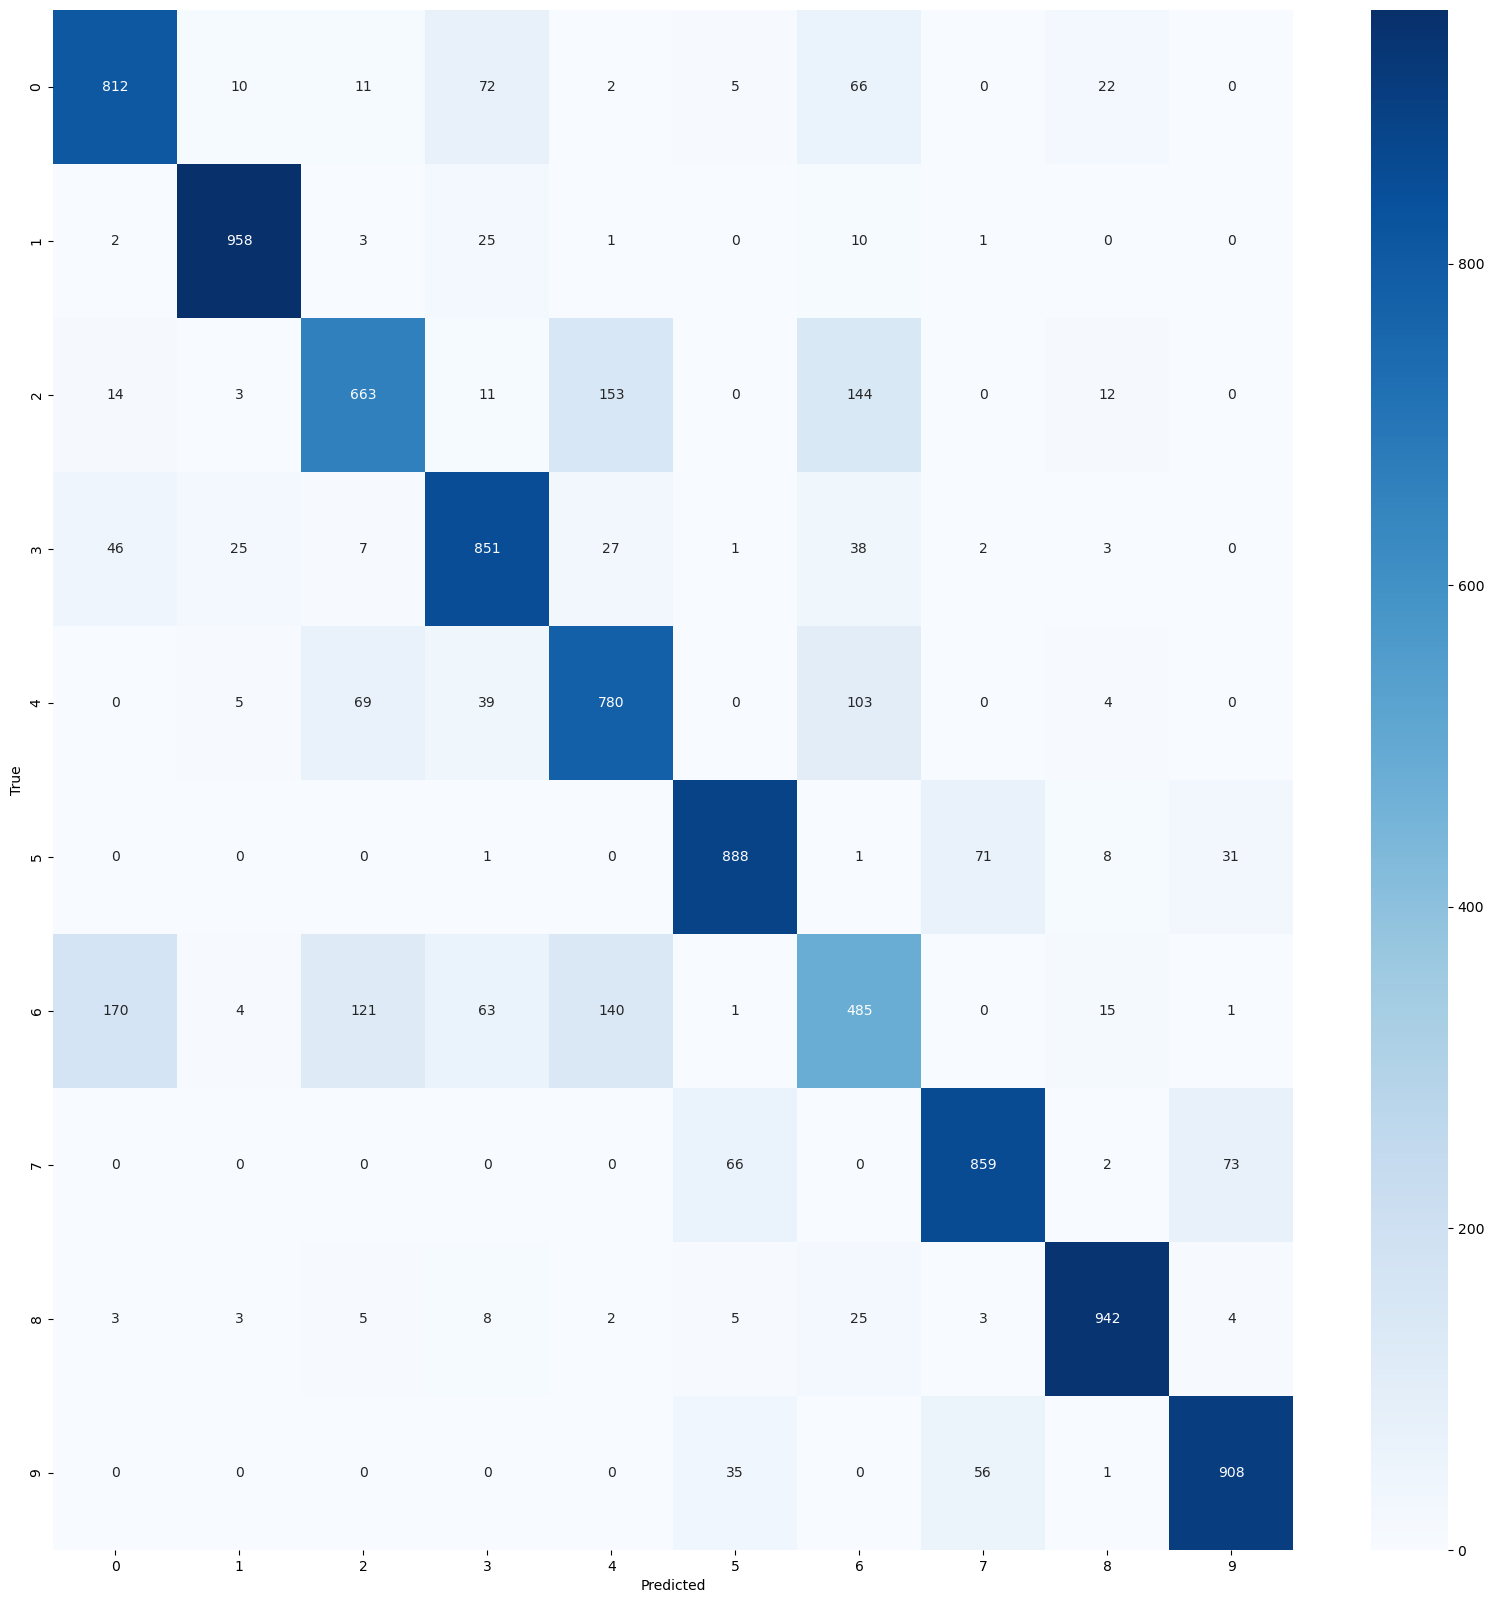

In [47]:
cm = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
from sklearn.svm import SVC

C = [0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for c in C:
    for k in kernel:
        svc = SVC(C=c, kernel=k)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"C: {c}, Kernel: {k}, Accuracy: {acc}")

C: 0.01, Kernel: linear, Accuracy: 0.8135714285714286
C: 0.01, Kernel: poly, Accuracy: 0.49814285714285716
C: 0.01, Kernel: rbf, Accuracy: 0.7857619047619048
C: 0.01, Kernel: sigmoid, Accuracy: 0.7666666666666667
C: 0.1, Kernel: linear, Accuracy: 0.8237619047619048
C: 0.1, Kernel: poly, Accuracy: 0.7181904761904762
C: 0.1, Kernel: rbf, Accuracy: 0.8306666666666667
C: 0.1, Kernel: sigmoid, Accuracy: 0.7733333333333333
C: 1, Kernel: linear, Accuracy: 0.8259047619047619
C: 1, Kernel: poly, Accuracy: 0.831952380952381
C: 1, Kernel: rbf, Accuracy: 0.8614285714285714
C: 1, Kernel: sigmoid, Accuracy: 0.7211904761904762
C: 10, Kernel: linear, Accuracy: 0.825952380952381
C: 10, Kernel: poly, Accuracy: 0.8638095238095238
C: 10, Kernel: rbf, Accuracy: 0.8737619047619047
C: 10, Kernel: sigmoid, Accuracy: 0.7034285714285714


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

svc = SVC(C=10, kernel='rbf')
svc.fit(results_train, label_train)
y_pred = svc.predict(results_test)
accuracy = accuracy_score(label_test, y_pred)

f1 = f1_score(label_test, y_pred, average='weighted')
precision = precision_score(label_test, y_pred, average='weighted')
recall = recall_score(label_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.883580,0.0
1,Precision,0.883593,0.0
2,Recall,0.883900,0.0


In [49]:
print(classification_report(label_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8195    0.8400    0.8296      1000
           1     0.9898    0.9740    0.9819      1000
           2     0.8302    0.8070    0.8185      1000
           3     0.8838    0.9050    0.8943      1000
           4     0.8164    0.8450    0.8305      1000
           5     0.9556    0.9260    0.9406      1000
           6     0.7232    0.6870    0.7046      1000
           7     0.9050    0.9340    0.9193      1000
           8     0.9702    0.9780    0.9741      1000
           9     0.9421    0.9430    0.9425      1000

    accuracy                         0.8839     10000
   macro avg     0.8836    0.8839    0.8836     10000
weighted avg     0.8836    0.8839    0.8836     10000



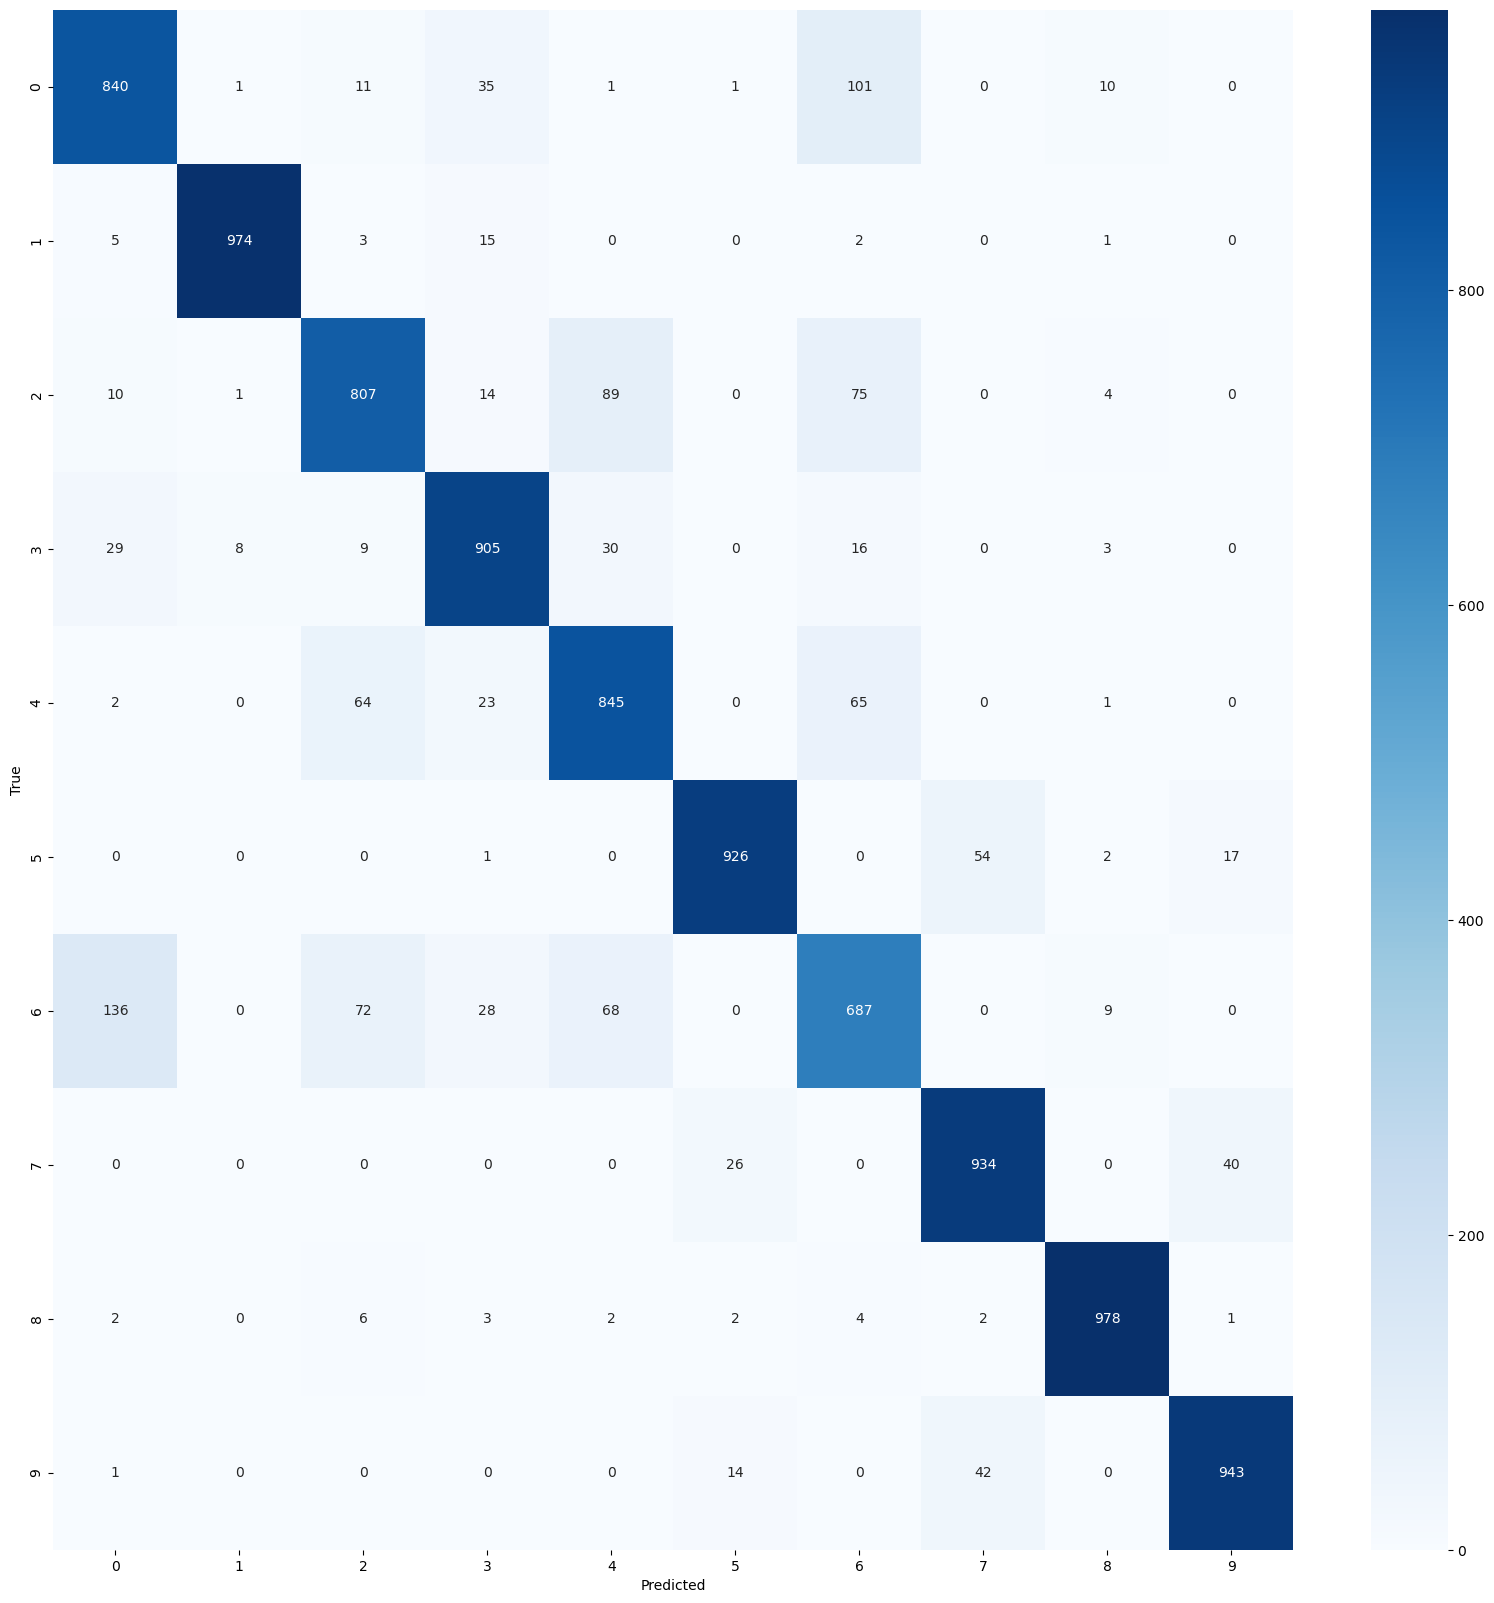

In [50]:
cm = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

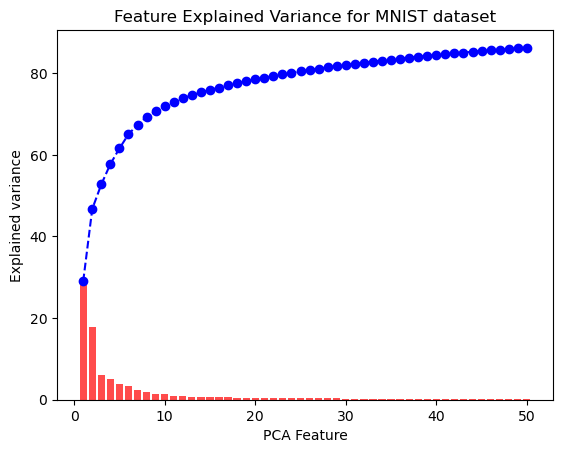

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

pca = PCA(n_components=50)
principal_components = pca.fit_transform(df_mnist_train)

explained_variance = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(range(1, 51), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.bar(range(1, 51), explained_variance, alpha=0.7, color='r')

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance for MNIST dataset')
plt.show()

In [16]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns

# # Apply PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(df_mnist_train)

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# pca_df['label'] = label_train

# # Plot the principal components
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10')
# plt.title('PCA mnist dataset')
# plt.show()

In [17]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import seaborn as sns

# # Apply PCA
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(df_mnist_train)

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# pca_df['label'] = label_train

# # Plot the principal components
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10')
# plt.title('PCA  dataset')
# plt.show()

pentru fashion mnist:

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


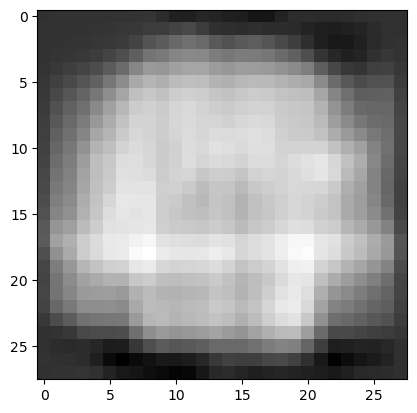

In [ ]:
#pulover
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[0].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


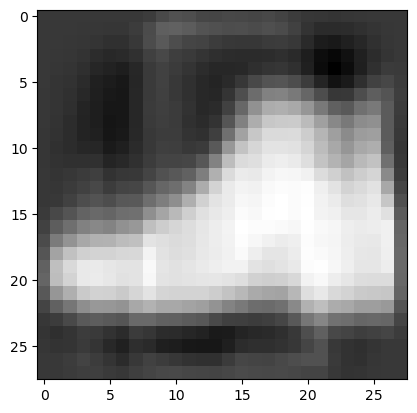

In [ ]:
#ankle boot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[1].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


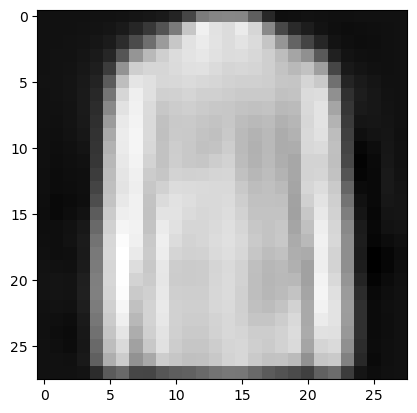

In [ ]:
#shirt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[2].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


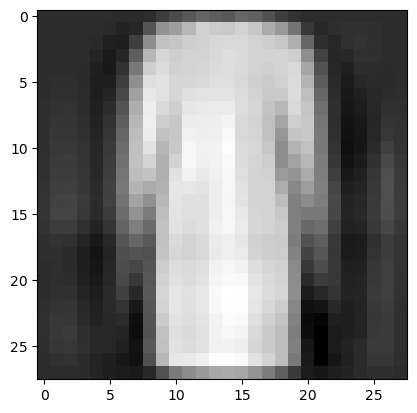

In [ ]:
#dress
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[4].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


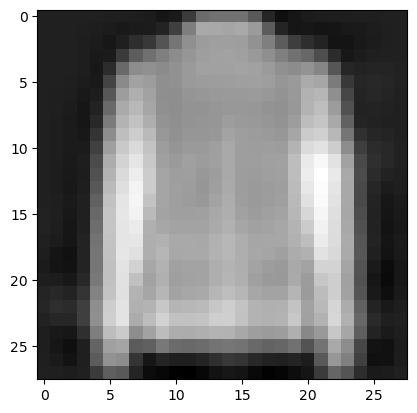

In [ ]:
#coat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[5].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


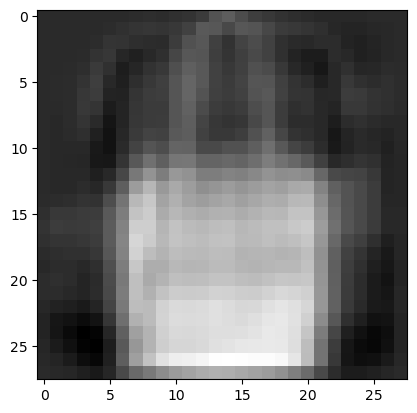

In [ ]:
#bag
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[9].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


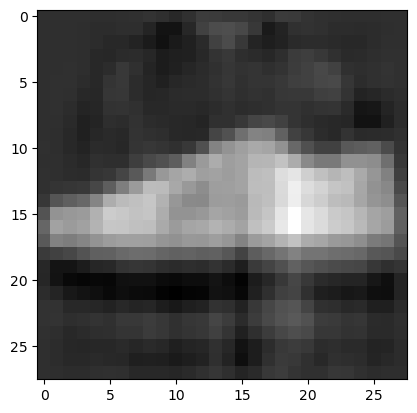

In [ ]:
#sandal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[7].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


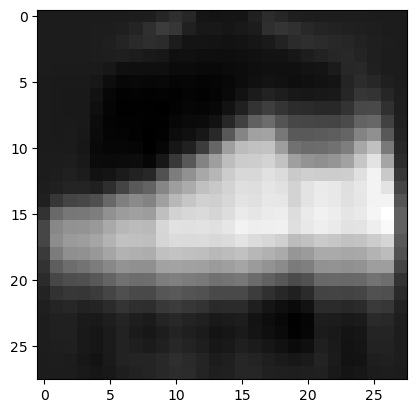

In [ ]:
#sneaker
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[21].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


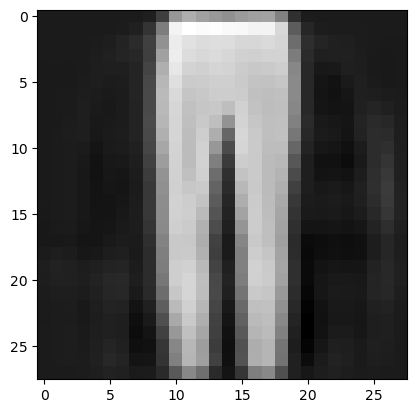

In [ ]:
#trousers
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=27)
pca.fit(df_mnist_train)
image_pca = pca.transform(df_mnist_train.iloc[29].values.reshape(1, -1))
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(28, 28), cmap='gray')
plt.show()

In [27]:
sorted_by_values = dict(sorted(number_train.items(), key=lambda item: item[1], reverse=True))

In [28]:
sorted_by_values

{'Apple': 7579,
 'Pear': 5252,
 'Tomato': 5103,
 'Cherry': 3444,
 'Grape': 3419,
 'Pepper': 2478,
 'Potato': 1803,
 'Plum': 1767,
 'Peach': 1722,
 'Banana': 1430,
 'Onion': 1333,
 'Cucumber': 1254,
 'Strawberry': 1230,
 'Nut': 1188,
 'Physalis': 984,
 'Cantaloupe': 984,
 'Pineapple': 983,
 'Lemon': 982,
 'Grapefruit': 982,
 'Nectarine': 972,
 'Avocado': 918,
 'Mango': 916,
 'Corn': 912,
 'Melon': 738,
 'Walnut': 735,
 'Eggplant': 708,
 'Cauliflower': 702,
 'Fig': 702,
 'Redcurrant': 492,
 'Papaya': 492,
 'Apricot': 492,
 'Pomegranate': 492,
 'Mulberry': 492,
 'Rambutan': 492,
 'Pitahaya': 490,
 'Raspberry': 490,
 'Granadilla': 490,
 'Tangelo': 490,
 'Guava': 490,
 'Clementine': 490,
 'Passion': 490,
 'Salak': 490,
 'Huckleberry': 490,
 'Lychee': 490,
 'Dates': 490,
 'Kumquats': 490,
 'Pepino': 490,
 'Quince': 490,
 'Kaki': 490,
 'Mandarine': 490,
 'Maracuja': 490,
 'Limes': 490,
 'Cactus': 490,
 'Carambula': 490,
 'Cocos': 490,
 'Tamarillo': 490,
 'Zucchini': 480,
 'Orange': 479,
 'Wat

In [29]:
import itertools
cumsum_values = list(itertools.accumulate(number_train.values()))
number_train_cumsum = dict(zip(number_train.keys(), cumsum_values))

In [30]:
number_train_cumsum

{'Lemon': 982,
 'Peach': 2704,
 'Avocado': 3622,
 'Pear': 8874,
 'Pitahaya': 9364,
 'Apple': 16943,
 'Cabbage': 17087,
 'Tomato': 22190,
 'Cucumber': 23444,
 'Melon': 24182,
 'Plum': 25949,
 'Banana': 27379,
 'Raspberry': 27869,
 'Granadilla': 28359,
 'Redcurrant': 28851,
 'Physalis': 29835,
 'Orange': 30314,
 'Tangelo': 30804,
 'Guava': 31294,
 'Clementine': 31784,
 'Cherry': 35228,
 'Chestnut': 35678,
 'Corn': 36590,
 'Pepper': 39068,
 'Grape': 42487,
 'Mangostan': 42787,
 'Passion': 43277,
 'Beetroot': 43727,
 'Mango': 44643,
 'Zucchini': 45123,
 'Grapefruit': 46105,
 'Strawberry': 47335,
 'Salak': 47825,
 'Cauliflower': 48527,
 'Huckleberry': 49017,
 'Cantaloupe': 50001,
 'Lychee': 50491,
 'Onion': 51824,
 'Pomelo': 52274,
 'Nectarine': 53246,
 'Hazelnut': 53710,
 'Potato': 55513,
 'Dates': 56003,
 'Eggplant': 56711,
 'Kumquats': 57201,
 'Kohlrabi': 57672,
 'Papaya': 58164,
 'Watermelon': 58639,
 'Apricot': 59131,
 'Pepino': 59621,
 'Fig': 60323,
 'Nut': 61511,
 'Quince': 62001,
 '

cele mai numeroase 10 clase sunt Apple, Pear, Tomato, Cherry, Grape, Pepper, Potato, Plum, Peach, Banana

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


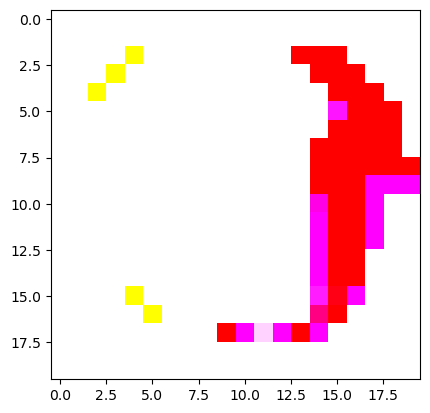

In [ ]:
#apple
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Apple Braeburn 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = img.flatten().reshape(1, -1)

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


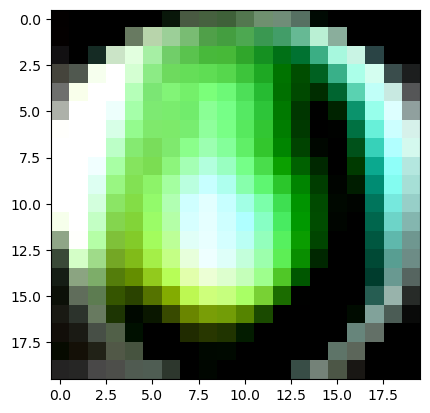

In [ ]:
#pear
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Pear 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


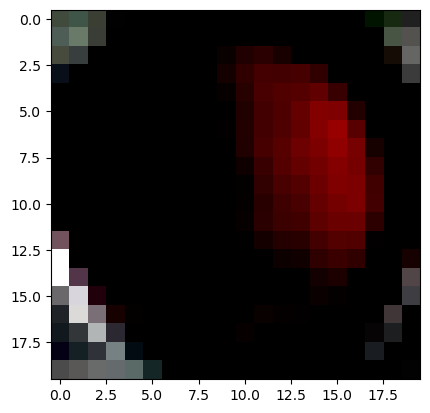

In [ ]:
#tomato
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Tomato 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


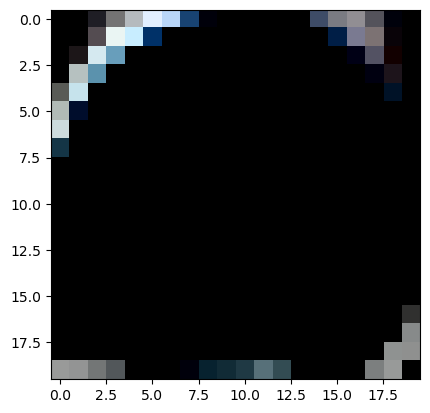

In [ ]:
#cherry
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Cherry 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


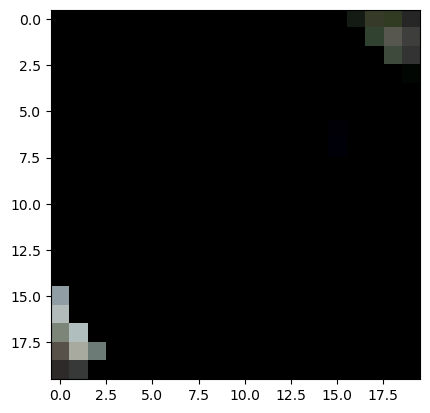

In [ ]:
#grape
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Grape Blue 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


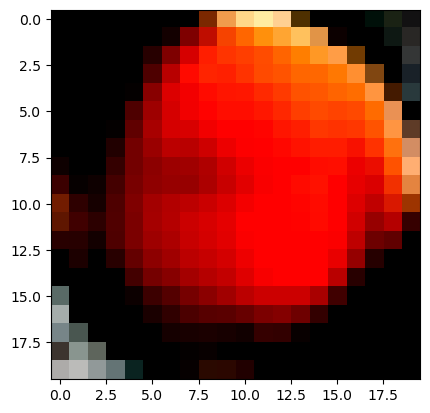

In [ ]:
#pepper
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Pepper Yellow 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


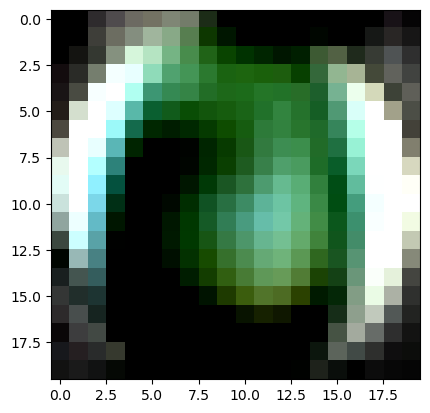

In [14]:
#potato
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Potato White 1/113_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


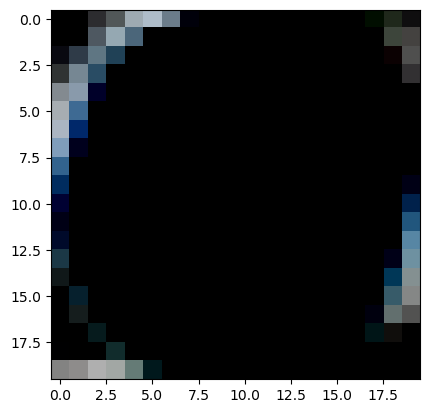

In [ ]:
#plum
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Plum 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


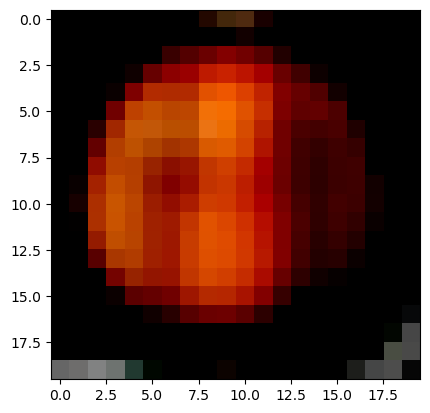

In [ ]:
#peach
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Peach 1/101_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


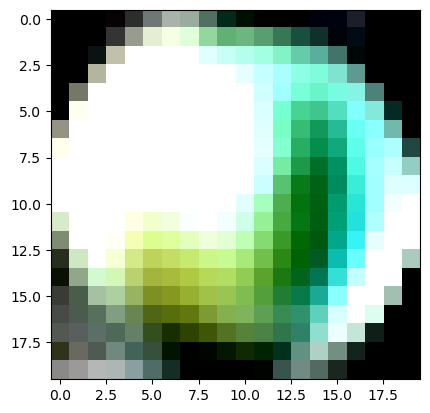

In [ ]:
#banana 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

img = cv2.imread(path_fruits_train + "/Banana 1/10_100.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (20, 20))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = scaler.transform(img.flatten().reshape(1, -1))

pca = PCA(n_components=27)
pca.fit(images_fruits_train)
image_pca = pca.transform(img)
image_restored = pca.inverse_transform(image_pca)

plt.imshow(image_restored.reshape(20, 20, 3))
plt.show()

In [9]:
#apply hu moments to the fruits dataset
import cv2
import numpy as np
import os
import pandas as pd

hu_moments = []
path = path_fruits + "Training"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments.append(humoments)

In [10]:
hu_moments = np.array(hu_moments)
hu_moments = [i.flatten() for i in hu_moments]

In [18]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Apple Braeburn 1/0_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 5


In [19]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Pear 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 5


In [20]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Tomato 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 1


In [21]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Cherry 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 10


In [22]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Grape Blue 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 1


In [23]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Pepper Yellow 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 4


In [24]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Potato White 1/113_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 11


In [25]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Plum 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 13


In [26]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Peach 1/101_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 2


In [27]:
#aplic pe alte imagini
import numpy as np 

# Let's load a simple image with 3 black squares 
image = cv2.imread(path_fruits_train + "/Banana 1/10_100.jpg")
cv2.waitKey(0) 

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 

# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 

print("Number of Contours found = " + str(len(contours)))

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 3


se aplica pca si hu moments pe toate imaginile

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

pca = PCA(n_components=20)
principal_components = pca.fit_transform(images_fruits_train)

In [12]:
results_train = []

for i in range(len(principal_components)):
    result = np.concatenate((principal_components[i], hu_moments[i]))
    results_train.append(result)

In [6]:
results_train = np.array(principal_components)

In [ ]:
# from sklearn import preprocessing
# import numpy as np

# scaler = preprocessing.StandardScaler().fit(results_train)

In [ ]:
# results_train = scaler.transform(results_train)

In [14]:
#apply hu moments to the fruits dataset
import cv2
import numpy as np
import os
import pandas as pd

hu_moments_test = []
path = path_fruits + "Test"
for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if os.path.isdir(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        for file in files:
            file_path = os.path.join(folder_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            _, im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)
            moments = cv2.moments(im)
            humoments = cv2.HuMoments(moments)
            for i in range(0, 7):
                humoments[i] = -1 * np.copysign(1.0, humoments[i]) * np.log10(np.abs(humoments[i]))
            hu_moments_test.append(humoments)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

pca = PCA(n_components=20)
principal_components_test = pca.fit_transform(images_fruits_test)

In [16]:
hu_moments_test = np.array(hu_moments_test)
hu_moments_test = [i.flatten() for i in hu_moments_test]

results_test = []
for i in range(len(principal_components_test)):
    result = np.concatenate((principal_components_test[i], hu_moments_test[i]))
    results_test.append(result)

In [8]:
results_test = np.array(principal_components_test)

In [ ]:
# from sklearn import preprocessing
# import numpy as np

# scaler_test = preprocessing.StandardScaler().fit(results_test)

In [ ]:
# results_test = scaler_test.transform(results_test)

In [64]:
Device = "cuda"

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(results_train, labels_fruits_train, test_size=0.35, random_state=42, shuffle=True)


In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.1, 1, 10]
max_iter = [100, 1000, 10000]
multi_class = ['auto', 'ovr', 'multinomial']
solver = ['newton-cg', 'lbfgs', 'sag', 'saga']

for c in C:
    for maxiter in max_iter:
        for multi in multi_class:
            for s in solver:
                lr = LogisticRegression(C=c, max_iter=maxiter, multi_class=multi, solver=s, n_jobs=-1)
                lr.fit(X_train, y_train)
                y_pred = lr.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                print(f"C: {c}, Max Iter: {maxiter}, Multi Class: {multi}, Solver: {s}, Accuracy: {acc}")

C: 0.001, Max Iter: 100, Multi Class: auto, Solver: newton-cg, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 100, Multi Class: auto, Solver: lbfgs, Accuracy: 0.42246271076523995
C: 0.001, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.42230058365758755


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.001, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.40106193255512324
C: 0.001, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.40077821011673154


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.001, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.40094033722438394


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.001, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.40118352788586253
C: 0.001, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.42246271076523995
C: 0.001, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.42230058365758755


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.001, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.42246271076523995
C: 0.001, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.42230058365758755
C: 0.001, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.40106193255512324
C: 0.001, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.40077821011673154
C: 0.001, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.40094033722438394
C: 0.001, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.40106193255512324
C: 0.001, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.42238164721141375
C: 0.001, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.4224627

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.6849059662775616


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.6819066147859922
C: 0.01, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.6358625162127107
C: 0.01, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.6355382619974059


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.6337953955901426


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.622162775616083
C: 0.01, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.685068093385214
C: 0.01, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.6849059662775616


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.6849464980544747


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.01, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.6819066147859922
C: 0.01, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.685068093385214
C: 0.01, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.6849059662775616
C: 0.01, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.6851086251621271
C: 0.01, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.6850275616083009
C: 0.01, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.6358625162127107
C: 0.01, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.6355382619974059
C: 0.01, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.6355382619974059
C: 0.01, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.6352140077821011
C: 0.01, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.685068093385214
C: 0.01, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.6849059662775616
C: 0.01, Max 

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: auto, Solver: sag, Accuracy: 0.7545800907911803


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: auto, Solver: saga, Accuracy: 0.7315985732814526
C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7241001945525292
C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7237759403372244


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: sag, Accuracy: 0.6931339169909209


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: ovr, Solver: saga, Accuracy: 0.6679636835278858
C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.7755350194552529
C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.775170233463035


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: sag, Accuracy: 0.7544990272373541


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 100, Multi Class: multinomial, Solver: saga, Accuracy: 0.7316796368352788
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.7755350194552529
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.775170233463035
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: sag, Accuracy: 0.7749270428015564
C: 0.1, Max Iter: 1000, Multi Class: auto, Solver: saga, Accuracy: 0.7737110894941635
C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: newton-cg, Accuracy: 0.7241001945525292
C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: lbfgs, Accuracy: 0.7237759403372244


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: sag, Accuracy: 0.7228842412451362


/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C: 0.1, Max Iter: 1000, Multi Class: ovr, Solver: saga, Accuracy: 0.7204118028534371
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: newton-cg, Accuracy: 0.7755350194552529
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: lbfgs, Accuracy: 0.775170233463035
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: sag, Accuracy: 0.7749270428015564
C: 0.1, Max Iter: 1000, Multi Class: multinomial, Solver: saga, Accuracy: 0.7737110894941635
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: newton-cg, Accuracy: 0.7755350194552529
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: lbfgs, Accuracy: 0.775170233463035
C: 0.1, Max Iter: 10000, Multi Class: auto, Solver: sag, Accuracy: 0.7749270428015564


KeyboardInterrupt: 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

model = LogisticRegression(C=0.1, max_iter=1000, multi_class='auto', solver = 'newton-cg', n_jobs=-1)

model.fit(results_train, labels_fruits_train)
y_pred = model.predict(results_test)
accuracy = accuracy_score(labels_fruits_test, y_pred)


accuracy = accuracy_score(labels_fruits_test, y_pred)
f1 = f1_score(labels_fruits_test, y_pred, average='weighted')
precision = precision_score(labels_fruits_test, y_pred, average='weighted')
recall = recall_score(labels_fruits_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.642175,0.0
1,Precision,0.648231,0.0
2,Recall,0.650536,0.0


In [11]:
from sklearn.metrics import classification_report
print(classification_report(labels_fruits_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Apple     0.5159    0.6808    0.5870      2525
     Apricot     0.7244    0.5610    0.6323       164
     Avocado     0.6684    0.8414    0.7450       309
      Banana     0.7104    0.5930    0.6464       484
    Beetroot     0.5781    0.2467    0.3458       150
   Blueberry     0.8455    0.6753    0.7509       154
     Cabbage     1.0000    0.9574    0.9783        47
      Cactus     0.5122    0.5060    0.5091       166
  Cantaloupe     0.9752    0.9573    0.9662       328
   Carambula     0.4242    0.2530    0.3170       166
      Carrot     0.8772    1.0000    0.9346        50
 Cauliflower     0.5964    0.7009    0.6444       234
      Cherry     0.5595    0.5366    0.5478      1148
    Chestnut     0.5631    0.3791    0.4531       153
  Clementine     0.9822    1.0000    0.9910       166
       Cocos     0.6893    0.7349    0.7114       166
        Corn     0.5874    0.4309    0.4972       304
    Cucumber     0.6725    

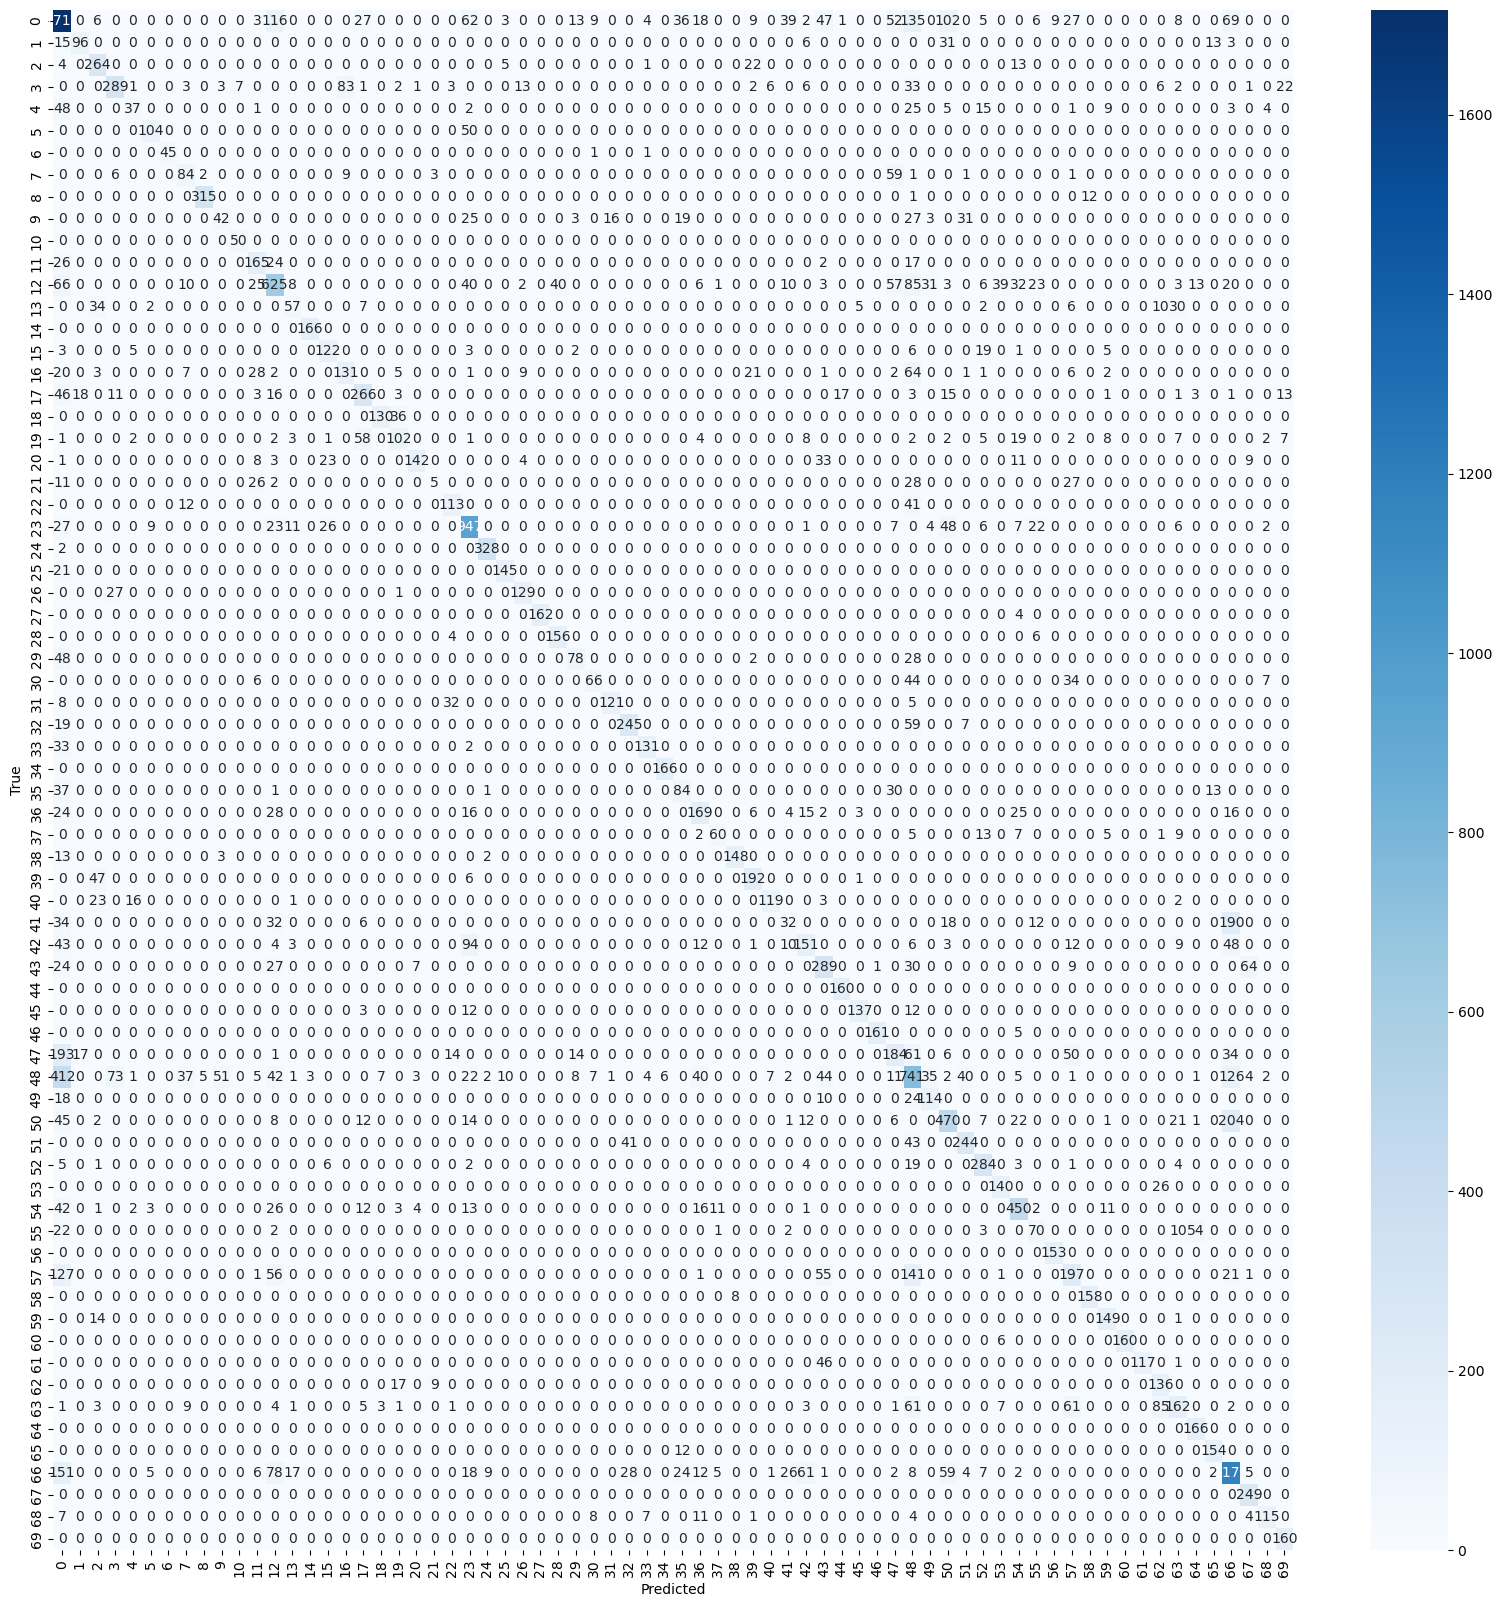

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels_fruits_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
from sklearn.svm import SVC

C = [0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for c in C:
    for k in kernel:
        svc = SVC(C=c, kernel=k)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"C: {c}, Kernel: {k}, Accuracy: {acc}")

C: 0.01, Kernel: linear, Accuracy: 0.8365758754863813
C: 0.01, Kernel: poly, Accuracy: 0.27427853437094685
C: 0.01, Kernel: rbf, Accuracy: 0.3402237354085603
C: 0.01, Kernel: sigmoid, Accuracy: 0.26430771725032426
C: 0.1, Kernel: linear, Accuracy: 0.913951037613489
C: 0.1, Kernel: poly, Accuracy: 0.7047665369649806
C: 0.1, Kernel: rbf, Accuracy: 0.8925097276264592
C: 0.1, Kernel: sigmoid, Accuracy: 0.5323848897535668
C: 1, Kernel: linear, Accuracy: 0.9391618028534371
C: 1, Kernel: poly, Accuracy: 0.9698443579766537
C: 1, Kernel: rbf, Accuracy: 0.9923800259403373
C: 1, Kernel: sigmoid, Accuracy: 0.5158479247730221
C: 10, Kernel: linear, Accuracy: 0.943985084306096
C: 10, Kernel: poly, Accuracy: 0.9984192607003891
C: 10, Kernel: rbf, Accuracy: 0.9988245784695201
C: 10, Kernel: sigmoid, Accuracy: 0.48139591439688717


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.svm import SVC

svc = SVC(C=10, kernel='rbf')
svc.fit(results_train, labels_fruits_train)
y_pred = svc.predict(results_test)
accuracy = accuracy_score(labels_fruits_test, y_pred)

f1 = f1_score(labels_fruits_test, y_pred, average='weighted')
precision = precision_score(labels_fruits_test, y_pred, average='weighted')
recall = recall_score(labels_fruits_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.941481,0.0
1,Precision,0.944203,0.0
2,Recall,0.941742,0.0


In [14]:
print(classification_report(labels_fruits_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Apple     0.9011    0.9774    0.9377      2525
     Apricot     0.9939    1.0000    0.9970       164
     Avocado     0.9035    1.0000    0.9493       309
      Banana     0.6423    0.8347    0.7260       484
    Beetroot     0.8976    0.7600    0.8231       150
   Blueberry     0.9935    1.0000    0.9968       154
     Cabbage     0.9388    0.9787    0.9583        47
      Cactus     0.9855    0.8193    0.8947       166
  Cantaloupe     0.9909    0.9970    0.9939       328
   Carambula     0.9750    0.9398    0.9571       166
      Carrot     1.0000    1.0000    1.0000        50
 Cauliflower     0.9331    0.9530    0.9429       234
      Cherry     0.9665    0.9556    0.9610      1148
    Chestnut     0.9481    0.8366    0.8889       153
  Clementine     1.0000    1.0000    1.0000       166
       Cocos     0.9866    0.8855    0.9333       166
        Corn     0.8708    0.5987    0.7096       304
    Cucumber     0.9713    

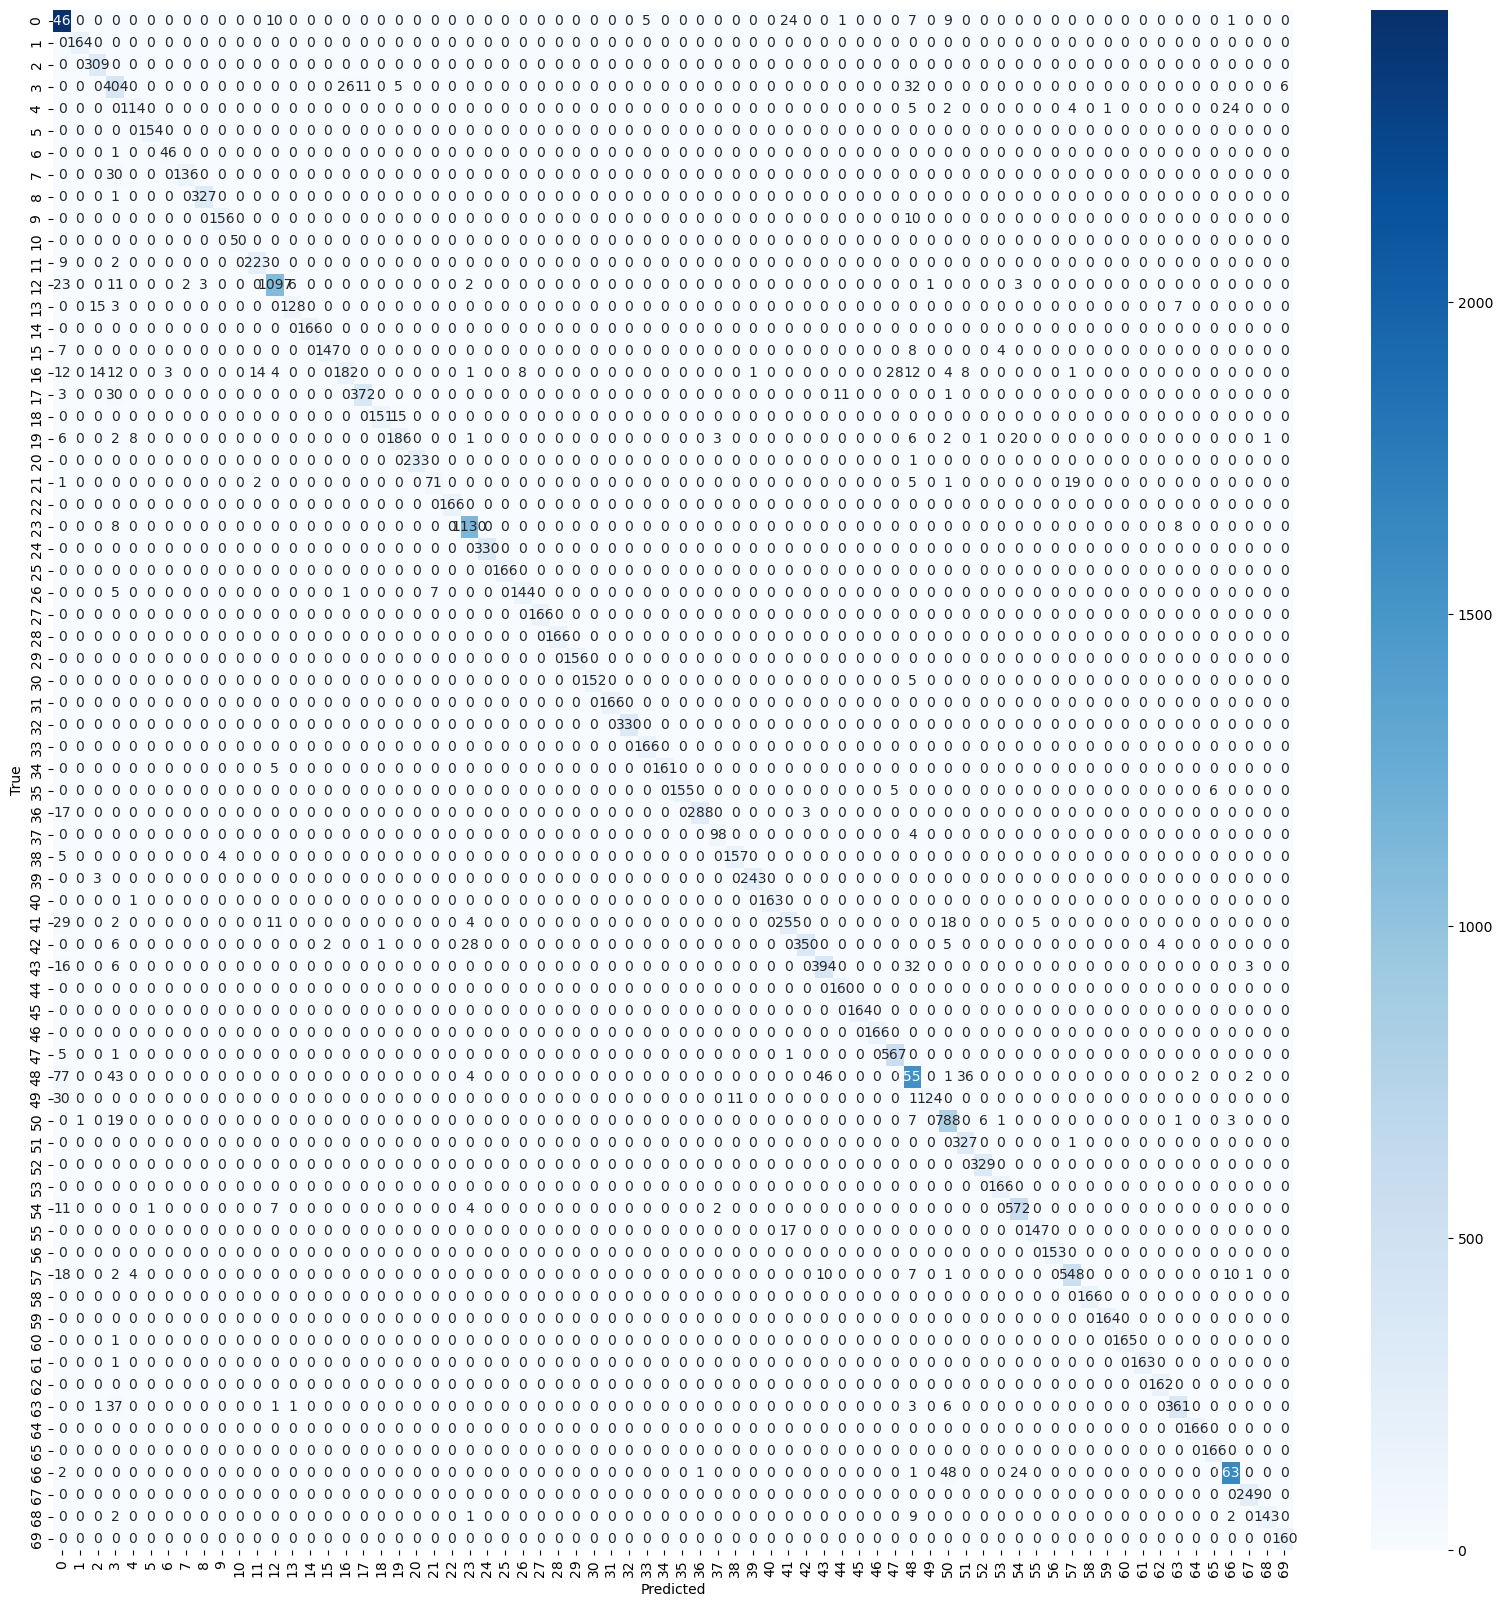

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels_fruits_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

number_trees = [5, 10, 50, 100, 200]
max_depth = [5, 10, 50, 100, 500, None]
max_features = [0.2, 0.5, 0.8, 1]

for number in number_trees:
    for maxd in max_depth:
        for feat in max_features:
            rf = RandomForestClassifier(n_estimators=number, max_depth=maxd, random_state=42, n_jobs=-1, max_samples=feat)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Number of Trees: {number}, Max Depth: {maxd} Accuracy: {acc}")

Number of Trees: 5, Max Depth: 5 Accuracy: 0.38278210116731515
Number of Trees: 5, Max Depth: 5 Accuracy: 0.35939526588845655
Number of Trees: 5, Max Depth: 5 Accuracy: 0.3657587548638132
Number of Trees: 5, Max Depth: 5 Accuracy: 0.10680123216601815
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7621190012970168
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7773994811932555
Number of Trees: 5, Max Depth: 10 Accuracy: 0.7711575875486382
Number of Trees: 5, Max Depth: 10 Accuracy: 0.10680123216601815
Number of Trees: 5, Max Depth: 50 Accuracy: 0.9272859922178989
Number of Trees: 5, Max Depth: 50 Accuracy: 0.9704118028534371
Number of Trees: 5, Max Depth: 50 Accuracy: 0.9792477302204928
Number of Trees: 5, Max Depth: 50 Accuracy: 0.10680123216601815
Number of Trees: 5, Max Depth: 100 Accuracy: 0.9272859922178989
Number of Trees: 5, Max Depth: 100 Accuracy: 0.9704118028534371
Number of Trees: 5, Max Depth: 100 Accuracy: 0.9792477302204928
Number of Trees: 5, Max Depth: 100 Accuracy: 0.1068

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

rf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1, max_samples=0.8)
rf.fit(results_train, labels_fruits_train)
y_pred = rf.predict(results_test)
acc = accuracy_score(labels_fruits_test, y_pred)

f1 = f1_score(labels_fruits_test, y_pred, average='weighted')
precision = precision_score(labels_fruits_test, y_pred, average='weighted')
recall = recall_score(labels_fruits_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.898641,0.0
1,Precision,0.905815,0.0
2,Recall,0.900504,0.0


In [18]:
print(classification_report(labels_fruits_test, y_pred, digits=4))

              precision    recall  f1-score   support

       Apple     0.9011    0.9774    0.9377      2525
     Apricot     0.9939    1.0000    0.9970       164
     Avocado     0.9035    1.0000    0.9493       309
      Banana     0.6423    0.8347    0.7260       484
    Beetroot     0.8976    0.7600    0.8231       150
   Blueberry     0.9935    1.0000    0.9968       154
     Cabbage     0.9388    0.9787    0.9583        47
      Cactus     0.9855    0.8193    0.8947       166
  Cantaloupe     0.9909    0.9970    0.9939       328
   Carambula     0.9750    0.9398    0.9571       166
      Carrot     1.0000    1.0000    1.0000        50
 Cauliflower     0.9331    0.9530    0.9429       234
      Cherry     0.9665    0.9556    0.9610      1148
    Chestnut     0.9481    0.8366    0.8889       153
  Clementine     1.0000    1.0000    1.0000       166
       Cocos     0.9866    0.8855    0.9333       166
        Corn     0.8708    0.5987    0.7096       304
    Cucumber     0.9713    

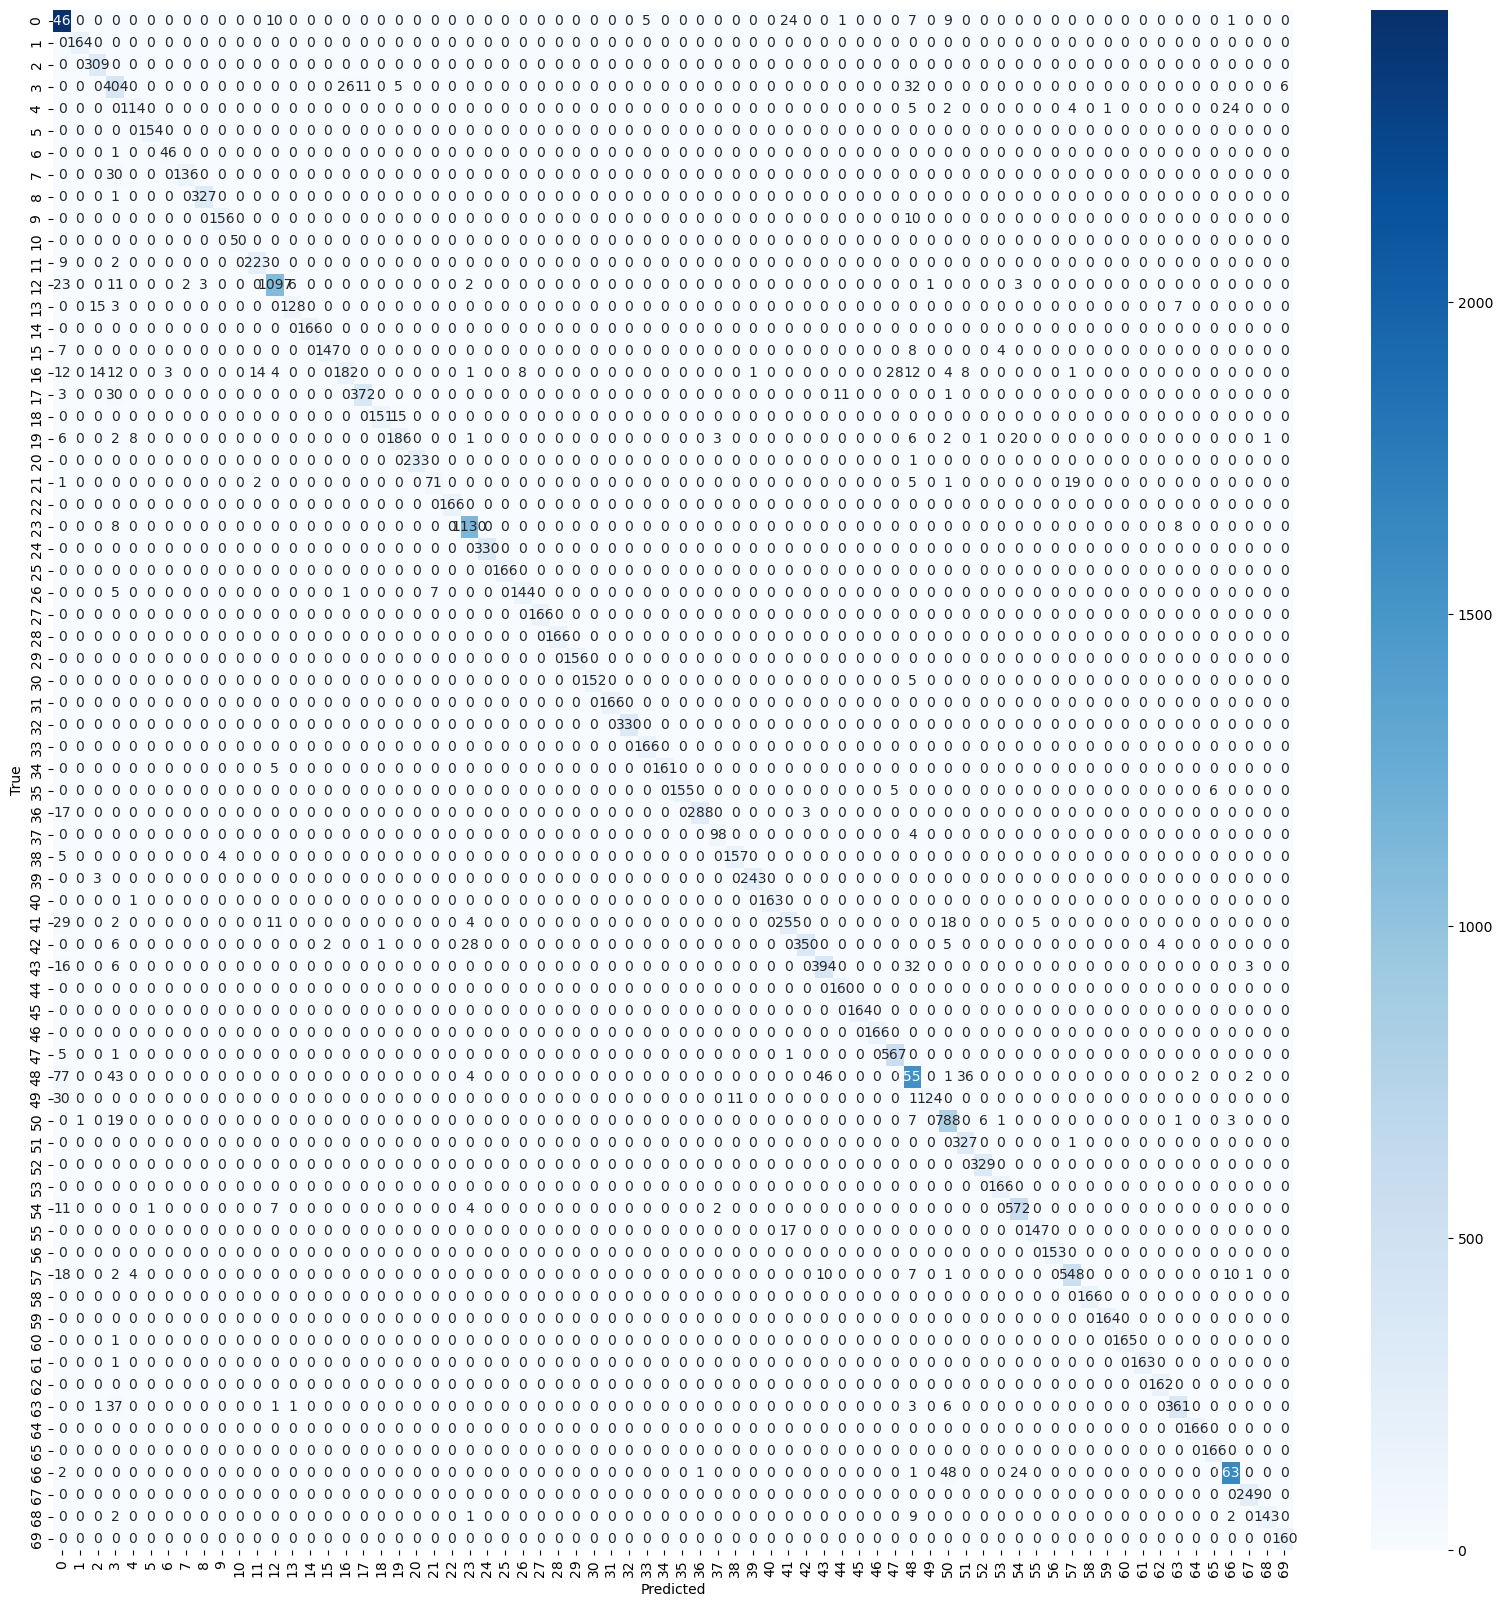

In [19]:
cm = confusion_matrix(labels_fruits_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

N = [10, 50, 100, 150, 200]
max_depth = [3, 5, 10, 20]
lr = [0.1, 0.01, 0.001]

label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)

for n in N:
    for maxd in max_depth:
        for learning in lr:
            params = {
                'max_depth': maxd,
                'learning_rate': learning,
                'objective': 'multi:softmax',
                'num_class': 70
            }
            xgb_model = xgb.train(params, xgb_train, num_boost_round=n)

            y_pred = xgb_model.predict(xgb_test)

            acc = accuracy_score(y_test, y_pred)
            print(f"Number of Trees: {n}, Max Depth: {maxd}, Learning Rate: {learning}, Accuracy: {acc}")


Number of Trees: 10, Max Depth: 3, Learning Rate: 0.1, Accuracy: 0.7707522697795072
Number of Trees: 10, Max Depth: 3, Learning Rate: 0.01, Accuracy: 0.6580333981841764
Number of Trees: 10, Max Depth: 3, Learning Rate: 0.001, Accuracy: 0.6033965629053177
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.1, Accuracy: 0.8893887808041504
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.01, Accuracy: 0.8266455901426718
Number of Trees: 10, Max Depth: 5, Learning Rate: 0.001, Accuracy: 0.7639429312581063
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.1, Accuracy: 0.9568741893644618
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.01, Accuracy: 0.9282182230869002
Number of Trees: 10, Max Depth: 10, Learning Rate: 0.001, Accuracy: 0.8830252918287937
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.1, Accuracy: 0.9709792477302205
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.01, Accuracy: 0.9358381971465629
Number of Trees: 10, Max Depth: 20, Learning Rate: 0.001, Acc

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import xgboost as xgb

label = LabelEncoder()
y_train = label.fit_transform(labels_fruits_train)
y_test = label.transform(labels_fruits_test)

xgb_train = xgb.DMatrix(results_train, label=y_train)
xgb_test = xgb.DMatrix(results_test, label=y_test)

params = {
        'max_depth': 5,
        'learning_rate': 0.1,
        'objective': 'multi:softmax',
        'num_class': 70
        }

xgb_model = xgb.train(params, xgb_train, num_boost_round=200)

y_pred = xgb_model.predict(xgb_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

avg_precision = precision.mean()
avg_recall = recall.mean()
avg_f1 = f1.mean()
var_precision = precision.var()
var_recall = recall.var()
var_f1 = f1.var()

data = {'Metric': ['F1 Score', 'Precision', 'Recall'],
        'Mean': [avg_f1, avg_precision, avg_recall],
        'Variance': [var_f1, var_precision, var_recall]}

df = pd.DataFrame(data)
df

,Metric,Mean,Variance
0,F1 Score,0.847844,0.0
1,Precision,0.859136,0.0
2,Recall,0.851518,0.0


In [23]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7333    0.9723    0.8360      2525
           1     0.6614    0.5122    0.5773       164
           2     0.8812    0.9126    0.8967       309
           3     0.7875    0.7273    0.7562       484
           4     0.7128    0.4467    0.5492       150
           5     1.0000    0.7338    0.8464       154
           6     0.7143    0.9574    0.8182        47
           7     0.7582    0.8313    0.7931       166
           8     1.0000    0.9756    0.9877       328
           9     0.8288    0.7289    0.7756       166
          10     0.7833    0.9400    0.8545        50
          11     0.9831    0.7479    0.8495       234
          12     0.9179    0.9155    0.9167      1148
          13     0.7890    0.5621    0.6565       153
          14     0.9688    0.9337    0.9509       166
          15     0.9392    0.8373    0.8854       166
          16     0.7310    0.4737    0.5749       304
          17     0.9531    

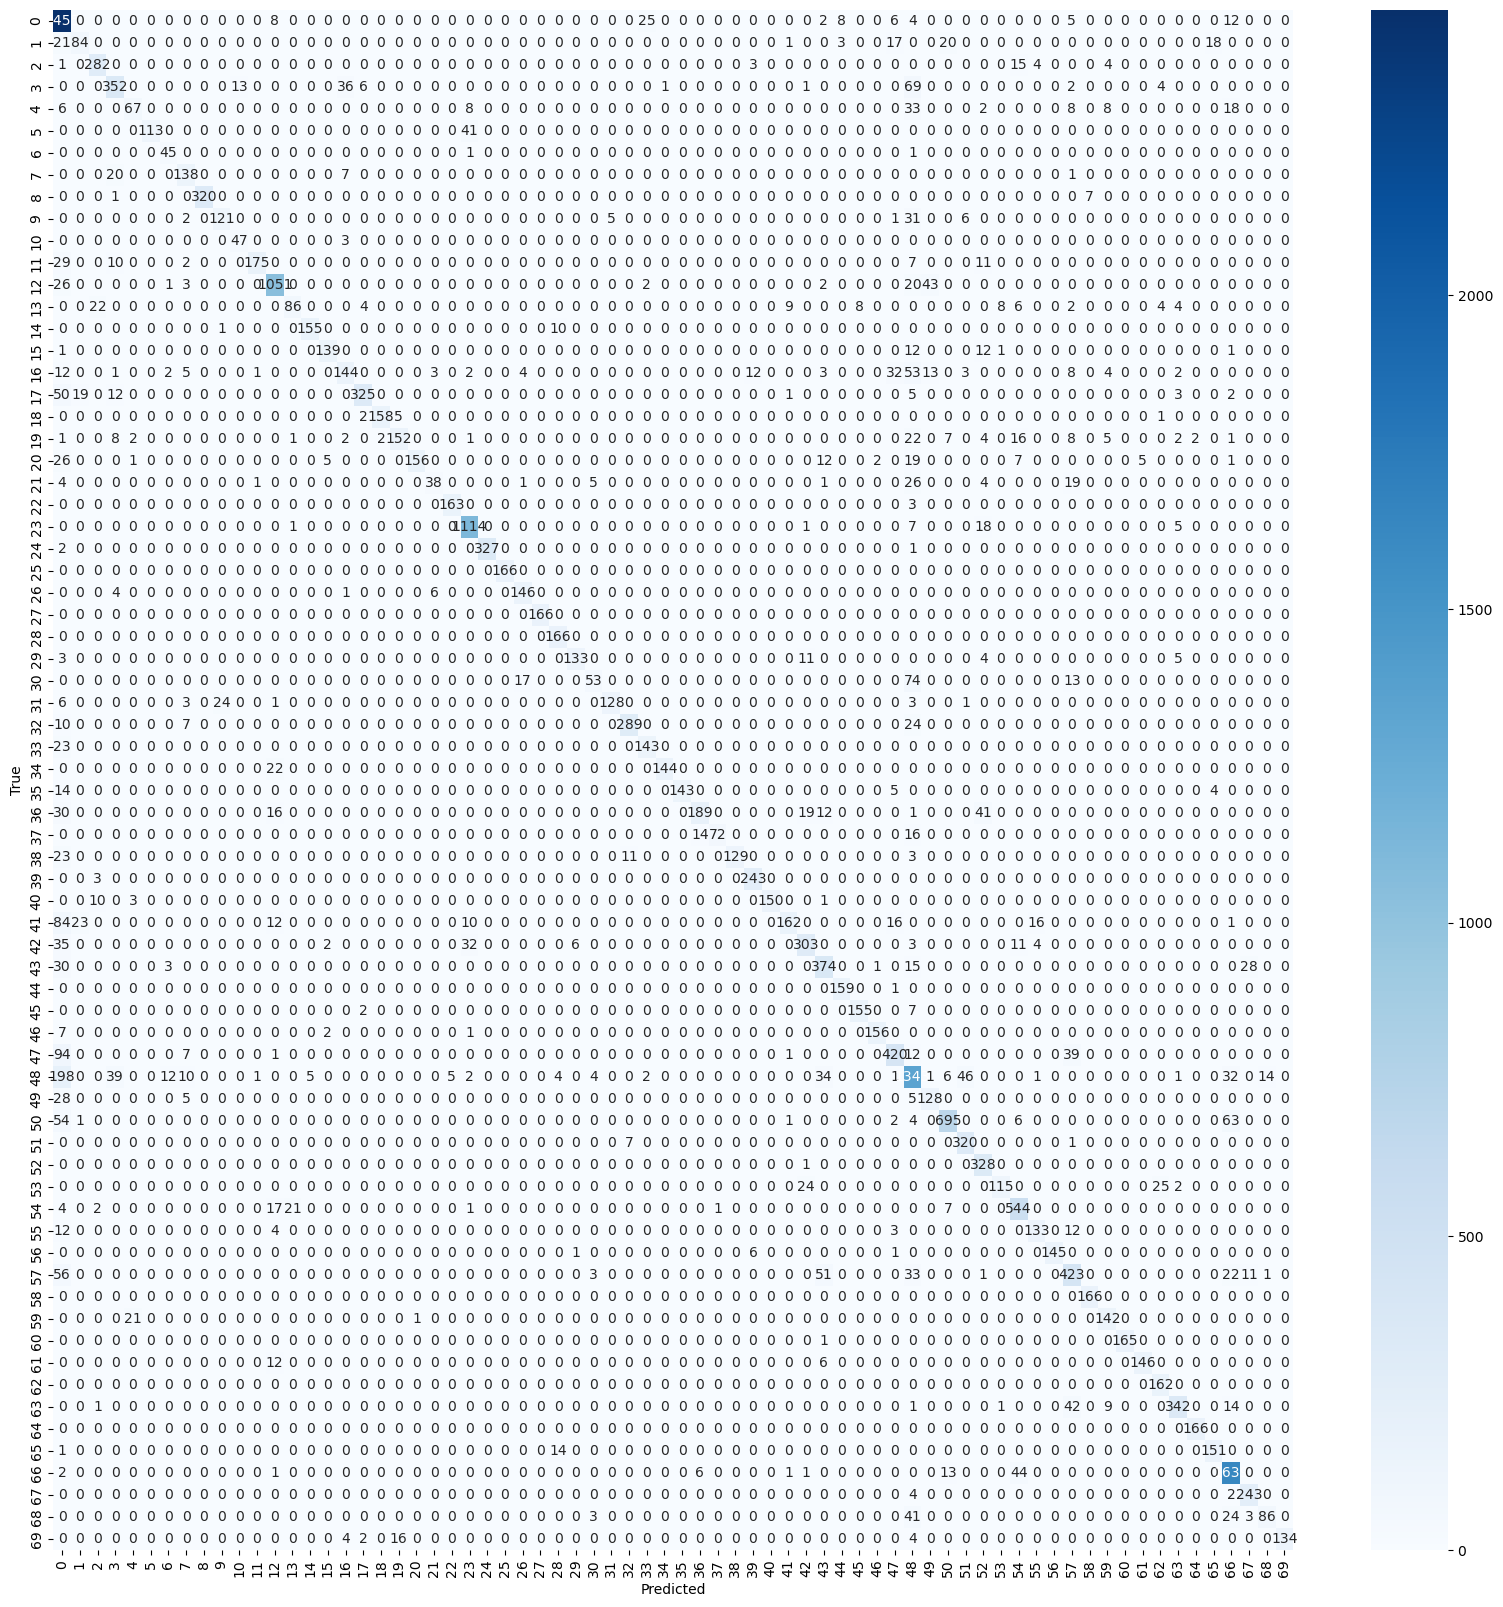

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()